<a name='1.1'></a>
## Installing & Import libraries

In [102]:
# General purpose
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
import os

# Text cleaning
import re
import string
import emoji
import demoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
# Stop words for text cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')  # Download the punkt tokenizer
nltk.download('wordnet')  # Download WordNet for lemmatization

# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from langdetect import detect, LangDetectException
from sklearn.preprocessing import OneHotEncoder
import contractions
from nltk.tokenize import word_tokenize

# Balancing
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, average_precision_score, confusion_matrix, roc_curve, auc

# Traditional Machine Learning Models
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
# from xgboost import xgBoost



# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.despine()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1006)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1006)>


<Figure size 640x480 with 0 Axes>

In [103]:

# Specify the directory to download NLTK data
nltk_data_dir = "requirements"

# Download the necessary NLTK resources to the specified directory
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)
nltk.download('punkt', download_dir=nltk_data_dir)

# Set the NLTK data path
nltk.data.path.append(nltk_data_dir)

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1006)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1006)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1006)>


In [104]:
import os
import zipfile

# Define the paths for the zip files
nltk_data_dir = "requirements"
corpora_dir = os.path.join(nltk_data_dir, "corpora")

# Ensure the corpora directory exists
if not os.path.exists(corpora_dir):
    os.makedirs(corpora_dir)

# Unzip the wordnet.zip and omw-1.4.zip files into the corpora directory
for zip_file in ["wordnet.zip", "omw-1.4.zip"]:
    zip_path = os.path.join(corpora_dir, zip_file)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(corpora_dir)

# Check if the data has been unzipped correctly
print("Contents of corpora directory after unzipping:", os.listdir(corpora_dir))

# Verify that NLTK can find the WordNet corpus
import nltk
nltk.data.path.append(nltk_data_dir)

try:
    from nltk.corpus import wordnet
    # Check if we can access the WordNet corpus
    print("WordNet path:", wordnet.root)
    print("Sample Synset:", wordnet.synsets('computer'))
except LookupError as e:
    print("Error accessing WordNet:", e)

Contents of corpora directory after unzipping: ['omw-1.4', 'omw-1.4.zip', 'wordnet', 'wordnet.zip']
WordNet path: d:\5th sem\NLP\eldup\requirements\corpora\wordnet
Sample Synset: [Synset('computer.n.01'), Synset('calculator.n.01')]


<a name='1.2'></a>
## Importing Datasets

In [105]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [106]:
input_dir = 'datasets'

# Find and read the CSV file
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)  

        # Check if the file is the one you need
        if filename == 'cyberbullying_tweets.csv.zip':
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            print("File loaded successfully!")

datasets\aggression_parsed_dataset.csv.zip
datasets\attack_parsed_dataset.csv.zip
datasets\cyberbullying_tweets.csv.zip
File loaded successfully!
datasets\kaggle_parsed_dataset.csv.zip
datasets\nlp-notebook-bully-detection-in-tweets.ipynb
datasets\toxicity_parsed_dataset.csv.zip
datasets\twitter_parsed_dataset.csv.zip
datasets\twitter_racism_parsed_dataset.csv.zip
datasets\twitter_sexism_parsed_dataset.csv.zip
datasets\youtube_parsed_dataset.csv.zip


In [107]:
print(df.head())

                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


### Second Dataset
After data cleaning, significant class distribution imbalances were detected, particularly in the 'Other-cyberbullying' and 'Not-cyberbullying' classes. To address this, the RandomOverSampler was initially implemented. However, after testing different classification models, the accuracy and F1 scores for these classes remained notably lower. Therefore, a supplementary dataset with binary labels was introduced in this stage [kaggle](https://www.kaggle.com/datasets/saurabhshahane/cyberbullying-dataset). 1700 instances from the ‘non-bullying’ class were integrated to augment the 'Not-cyberbullying' class. Due to the diverse nature of the ‘bully’ class in the second dataset, filling the ‘Other cyberbullying’ class using this dataset seems illogical, leading to the removal of this column from the main dataset to maintain consistency.

In [108]:
input_dir = 'datasets'

# Find and read the CSV file
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)  

        # Check if the file is the one you need
        if filename == 'aggression_parsed_dataset.csv.zip':
            # Read the CSV file into a DataFrame
            df2 = pd.read_csv(file_path)
            print("File loaded successfully!")

datasets\aggression_parsed_dataset.csv.zip
File loaded successfully!
datasets\attack_parsed_dataset.csv.zip
datasets\cyberbullying_tweets.csv.zip
datasets\kaggle_parsed_dataset.csv.zip
datasets\nlp-notebook-bully-detection-in-tweets.ipynb
datasets\toxicity_parsed_dataset.csv.zip
datasets\twitter_parsed_dataset.csv.zip
datasets\twitter_racism_parsed_dataset.csv.zip
datasets\twitter_sexism_parsed_dataset.csv.zip
datasets\youtube_parsed_dataset.csv.zip


In [109]:
df2

index                                               Text  ed_label_0  \
0            0  `- This is not ``creative``.  Those are the di...    0.900000   
1            1  `  :: the term ``standard model`` is itself le...    1.000000   
2            2    True or false, the situation as of March 200...    1.000000   
3            3   Next, maybe you could work on being less cond...    0.555556   
4            4               This page will need disambiguation.     1.000000   
...        ...                                                ...         ...   
115859  115859  `   These sources don't exactly exude a sense ...    0.777778   
115860  115860    The Institute for Historical Review is a pee...    1.000000   
115861  115861   :The way you're trying to describe it in this...    1.000000   
115862  115862    == Warning ==  There is clearly a protection...    0.500000   
115863  115863  Alternate option=== Is there perhaps enough ne...    1.000000   

        ed_label_1  oh_label  
0         0.100000         0  
1         0.000000         0  
2         0.000000         0  
3         0.444444         0  
4         0.000000         0  
...            ...       ...  
115859    0.222222         0  
115860    0.000000         0  
115861    0.000000         0  
115862    0.500000         0  
115863    0.000000         0  

[115864 rows x 5 columns]

In [110]:
useful_columns = ['Text', 'oh_label']
df2 = df2[useful_columns]

In [111]:
df2['oh_label'].value_counts()

oh_label
0    101082
1     14782
Name: count, dtype: int64

In [112]:
df2 = df2.rename(columns={'Text':'tweet_text','oh_label': 'cyberbullying_type'})

In [113]:
df2

tweet_text  cyberbullying_type
0       `- This is not ``creative``.  Those are the di...                   0
1       `  :: the term ``standard model`` is itself le...                   0
2         True or false, the situation as of March 200...                   0
3        Next, maybe you could work on being less cond...                   0
4                    This page will need disambiguation.                    0
...                                                   ...                 ...
115859  `   These sources don't exactly exude a sense ...                   0
115860    The Institute for Historical Review is a pee...                   0
115861   :The way you're trying to describe it in this...                   0
115862    == Warning ==  There is clearly a protection...                   0
115863  Alternate option=== Is there perhaps enough ne...                   0

[115864 rows x 2 columns]

In [114]:
df2.iloc[115840][0]

' shut up mind your own business and go fuck some one else over   '

In [115]:
# Tweets belonging to the category "not bully" is selected.

not_bully_df = df2[df2['cyberbullying_type'] == 0]

In [116]:
# the length of tweets is measured
not_bully_df['text_len'] = [len(text.split()) for text in not_bully_df.tweet_text];
not_bully_df

tweet_text  cyberbullying_type  \
0       `- This is not ``creative``.  Those are the di...                   0   
1       `  :: the term ``standard model`` is itself le...                   0   
2         True or false, the situation as of March 200...                   0   
3        Next, maybe you could work on being less cond...                   0   
4                    This page will need disambiguation.                    0   
...                                                   ...                 ...   
115859  `   These sources don't exactly exude a sense ...                   0   
115860    The Institute for Historical Review is a pee...                   0   
115861   :The way you're trying to describe it in this...                   0   
115862    == Warning ==  There is clearly a protection...                   0   
115863  Alternate option=== Is there perhaps enough ne...                   0   

        text_len  
0            386  
1            123  
2             59  
3             75  
4              5  
...          ...  
115859       111  
115860        74  
115861        33  
115862       133  
115863        39  

[101082 rows x 3 columns]

Because it has been understood in the next stages that 99% of the tweets in the main dataset are below 32 words, it has been decided to only include tweets with a length below 50 words randomly in the main dataset.

It is noted that the size of tweets will be reduced after cleaning and removing certain characters or stop words.

In [117]:
not_bully_df = not_bully_df[not_bully_df['text_len']<50] # tweets which their lenth are below 50
random_rows = not_bully_df.sample(n=1700) # 1700 tweets are added
random_rows

tweet_text  cyberbullying_type  \
87523   `::: Books LLC can be removed from search resu...                   0   
13200     == school page ==  for the last few says i c...                   0   
81242     == World Series ==  Would it be appropriate ...                   0   
45555     These are by figures released from the Heart...                   0   
11602     IT should bee mentioned that planck is the  ...                   0   
...                                                   ...                 ...   
88560     == Your great map ==  Thank you so much for ...                   0   
76731                  ok, i will take care about it.                       0   
52914   not an Encyclopedia and is being used to destr...                   0   
102220                ::Well played.  Happy new year.                       0   
8669    `  == Something for you... ==   Distinguished ...                   0   

        text_len  
87523         21  
13200         28  
81242         27  
45555         23  
11602         13  
...          ...  
88560         48  
76731          7  
52914         15  
102220         5  
8669          24  

[1700 rows x 3 columns]

In [118]:
 # changing the labels from 0 to not_cyberbulling
random_rows['cyberbullying_type'] = random_rows['cyberbullying_type'].replace(0, 'not_cyberbullying')
# dropping the tweet lenth after filtering
random_rows = random_rows.drop(columns=['text_len'])


In [119]:
df = pd.concat([df, random_rows])
df

tweet_text cyberbullying_type
0       In other words #katandandre, your food was cra...  not_cyberbullying
1       Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2       @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3       @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4       @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                   ...                ...
88560     == Your great map ==  Thank you so much for ...  not_cyberbullying
76731                  ok, i will take care about it.      not_cyberbullying
52914   not an Encyclopedia and is being used to destr...  not_cyberbullying
102220                ::Well played.  Happy new year.      not_cyberbullying
8669    `  == Something for you... ==   Distinguished ...  not_cyberbullying

[49392 rows x 2 columns]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49392 entries, 0 to 8669
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          49392 non-null  object
 1   cyberbullying_type  49392 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [121]:
# Renaming the columns name
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [122]:
# Finding duplicated tweets and dropping them
print(f'Number of duplicated tweets',df.duplicated().sum())
df = df[~df.duplicated()]

Number of duplicated tweets 36


In [123]:
df['sentiment'].value_counts()

sentiment
not_cyberbullying      9637
religion               7997
age                    7992
ethnicity              7959
gender                 7948
other_cyberbullying    7823
Name: count, dtype: int64

At this stage, it is observed that the number of instances belonging to the not_cyberbullying class is significantly higher than the other classes. However, after cleaning, its count will decrease, and it can then be considered in a balanced situation along with the other classes.

<a name='1.3'></a>

## Data Cleaning

### Define Cleaning Functions

In [124]:
# Clean emojis from text
def remove_emoji(text):
    return demoji.replace(text, '')

#demoji.replace_with_desc()

In [125]:
# Remove punctuations, stopwords, links, mentions and new line characters
def remove_all_entities(text):
    # Replacing newline and carriage return characters with a space and converting the text to lowercase
    text = re.sub(r'\r|\n', ' ', text.lower())  
    # Removing links and mentions
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  
    # Removing non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)
    
    # Defining the list of punctuation characters
    banned_list = string.punctuation
    # Creating a translation table to remove punctuation characters from text
    table = str.maketrans('', '', banned_list)
    # Removing punctuation characters from the text using the translation table
    text = text.translate(table)
    # Tokenizing the text into individual words, excluding stop words, and join them back into a single string
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [126]:
# Remove '#' symbols from hashtags at the end of the sentence, and keep those in the middle of the sentence
def clean_hashtags(tweet):
    # Removing hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()
    
    # Removing the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()
    
    return new_tweet

In [127]:
# Remove special characters such as & and $ present in some words
def remove_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

In [128]:
# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

In [129]:
# Check if the text is in English, and return an empty string if it's not
def remove_non_english(text):
    try:
        language = detect(text)
    except LangDetectException:
        language = "unknown"
    return text if language == "en" else ""

In [130]:
# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [131]:
# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [132]:
# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()
# Lemmatize words
def lemmatize(text):
    # Tokenizing the input text into individual words
    words = word_tokenize(text)
    # Lemmatizing each word in the tokenized text using the lemmatizer
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Joining the lemmatized words back into a single string
    return ' '.join(lemmatized_words)

In [133]:
# Remove short words
def remove_short_words(text, min_len=2):
    # Spliting the input text into individual words
    words = text.split()
    # Filtering out words shorter than the specified minimum length
    long_words = [word for word in words if len(word) >= min_len]
    # Joining the remaining long words back into a single string
    return ' '.join(long_words)

In [134]:
# Replace elongated words with their base form
#Elongated words are words that contain repeated characters, such as "loooove" for "love" or "cooool" for "cool".
def correct_elongated_words(text):
    # Defining a regular expression pattern to match elongated words
    regular_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    # Using the regular expression substitution to correct elongated words
    # Replacing the elongated part of the word with a single occurrence of the repeated character
    return re.sub(regular_pattern, r'\1\3\4', text)

In [135]:
# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

In [136]:
# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

In [137]:
def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

In [138]:
# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

In [139]:
# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

In [140]:
# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = remove_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = remove_non_english(tweet)
    tweet = remove_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = remove_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = correct_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

### Applying the cleaning functions on dataset

In [141]:
df['text_clean'] = [clean_tweet(tweet) for tweet in df['text']]

In [142]:
df

text          sentiment  \
0       In other words #katandandre, your food was cra...  not_cyberbullying   
1       Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2       @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3       @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4       @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                   ...                ...   
88560     == Your great map ==  Thank you so much for ...  not_cyberbullying   
76731                  ok, i will take care about it.      not_cyberbullying   
52914   not an Encyclopedia and is being used to destr...  not_cyberbullying   
102220                ::Well played.  Happy new year.      not_cyberbullying   
8669    `  == Something for you... ==   Distinguished ...  not_cyberbullying   

                                               text_clean  
0                  word katandandre food crapilicious mkr  
1       aussietv white mkr theblock imacelebrityau tod...  
2                         classy whore red velvet cupcake  
3       meh thanks head concerned another angry dude t...  
4       isi account pretending kurdish account like is...  
...                                                   ...  
88560   great map thank much excellent costa concordia...  
76731                                        ok take care  
52914   encyclopedia used destroy real form human know...  
102220                         well played happy new year  
8669    something distinguished service award signific...  

[49356 rows x 3 columns]

### Duplicated tweets after cleaning

In [143]:
print(f'{int(df["text_clean"].duplicated().sum())} duplicated tweets is removed.')
df.drop_duplicates("text_clean", inplace=True)

6419 duplicated tweets is removed.


In [144]:
df['sentiment'].value_counts()

sentiment
religion               7915
age                    7813
not_cyberbullying      7619
ethnicity              7413
gender                 7282
other_cyberbullying    4895
Name: count, dtype: int64

As shown, except for the other_cyberbullying class, all classes have approximately a balanced number of rows.

<a name='2'></a>

# Analyzing the dataset

In [145]:
documents = df['text_clean']
# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform the text into vectors
X = vectorizer.fit_transform(documents)

# Print the vocabulary and vectorized output
print(vectorizer.get_feature_names_out())  # Vocabulary (words)



['aa' 'aaa' 'aaaaaaaa' ... 'zynga' 'zz' 'zzz']


### Define n-gram and wordcloud visualization functions

In [146]:
def get_top_n_gram(corpus, ngram_range, n=None):
    # Initializing a CountVectorizer with specified n-gram range
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    # Transforming the corpus into a bag of words representation
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    # Creating a list of tuples containing words and their frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sorting the list of tuples by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [147]:
def generate_wordcloud(sentiment, df):
    plt.figure(figsize=(20, 10))
    subset = df[df['sentiment'] == sentiment]
    text_sentiment = subset.text_clean.values
    cloud = WordCloud(background_color='black', colormap="Dark2", collocations=False, width=2000, height=1000).generate(" ".join(text_sentiment))
    
    plt.axis('off')
    plt.title(sentiment.capitalize(), fontsize=40)
    plt.imshow(cloud)
    
    plt.savefig(f"{sentiment}_wordcloud.svg", format='svg', bbox_inches='tight')
    plt.show()

In [148]:
def plot_ngrams(sentiment, df):
    subset = df[df['sentiment'] == sentiment]
    text_sentiment = subset.text_clean.values
    
    # Calculating the top unigrams and bigrams
    unigrams = get_top_n_gram(text_sentiment, (1, 1), 10)
    bigrams = get_top_n_gram(text_sentiment, (2, 2), 10)

    # Creating DataFrames from the top unigrams and bigrams
    unigrams_df = pd.DataFrame(unigrams, columns=['text_clean', 'count'])
    bigrams_df = pd.DataFrame(bigrams, columns=['text_clean', 'count'])

    # Grouping by 'Text', summing the counts, and sorting the values in ascending order
    unigrams_grouped = unigrams_df.groupby('text_clean').sum()['count'].sort_values(ascending=True)
    bigrams_grouped = bigrams_df.groupby('text_clean').sum()['count'].sort_values(ascending=True)

    # Converting the Series objects to DataFrames
    unigrams_df = unigrams_grouped.reset_index()
    bigrams_df = bigrams_grouped.reset_index()


    # Creating subplots with two bar plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # top 10 unigrams
    sns.barplot(x="count", y="text_clean", data=unigrams_df, ax=axes[0], palette="viridis", edgecolor = 'black')
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel("Unigrams")
    axes[0].set_title("Top 10 Unigrams")
    axes[0].xaxis.grid(True, alpha=0.3)


    # top 10 bigrams
    sns.barplot(x="count", y="text_clean", data=bigrams_df, ax=axes[1], palette="viridis", edgecolor = 'black')
    axes[1].set_xlabel("Count")
    axes[1].set_ylabel("Bigrams")
    axes[1].set_title("Top 10 Bigrams")
    axes[1].xaxis.grid(True, alpha=0.3)


    # Showing plot
    plt.tight_layout()
    plt.suptitle(f'Top 10 Ngrams in {sentiment.capitalize()}', fontsize=16)
    #plt.savefig(f"{sentiment}_ngrams.svg", format='svg', bbox_inches='tight')
    plt.show()

<a name='2.1'></a>

## Category-wise Analysis

### Religion

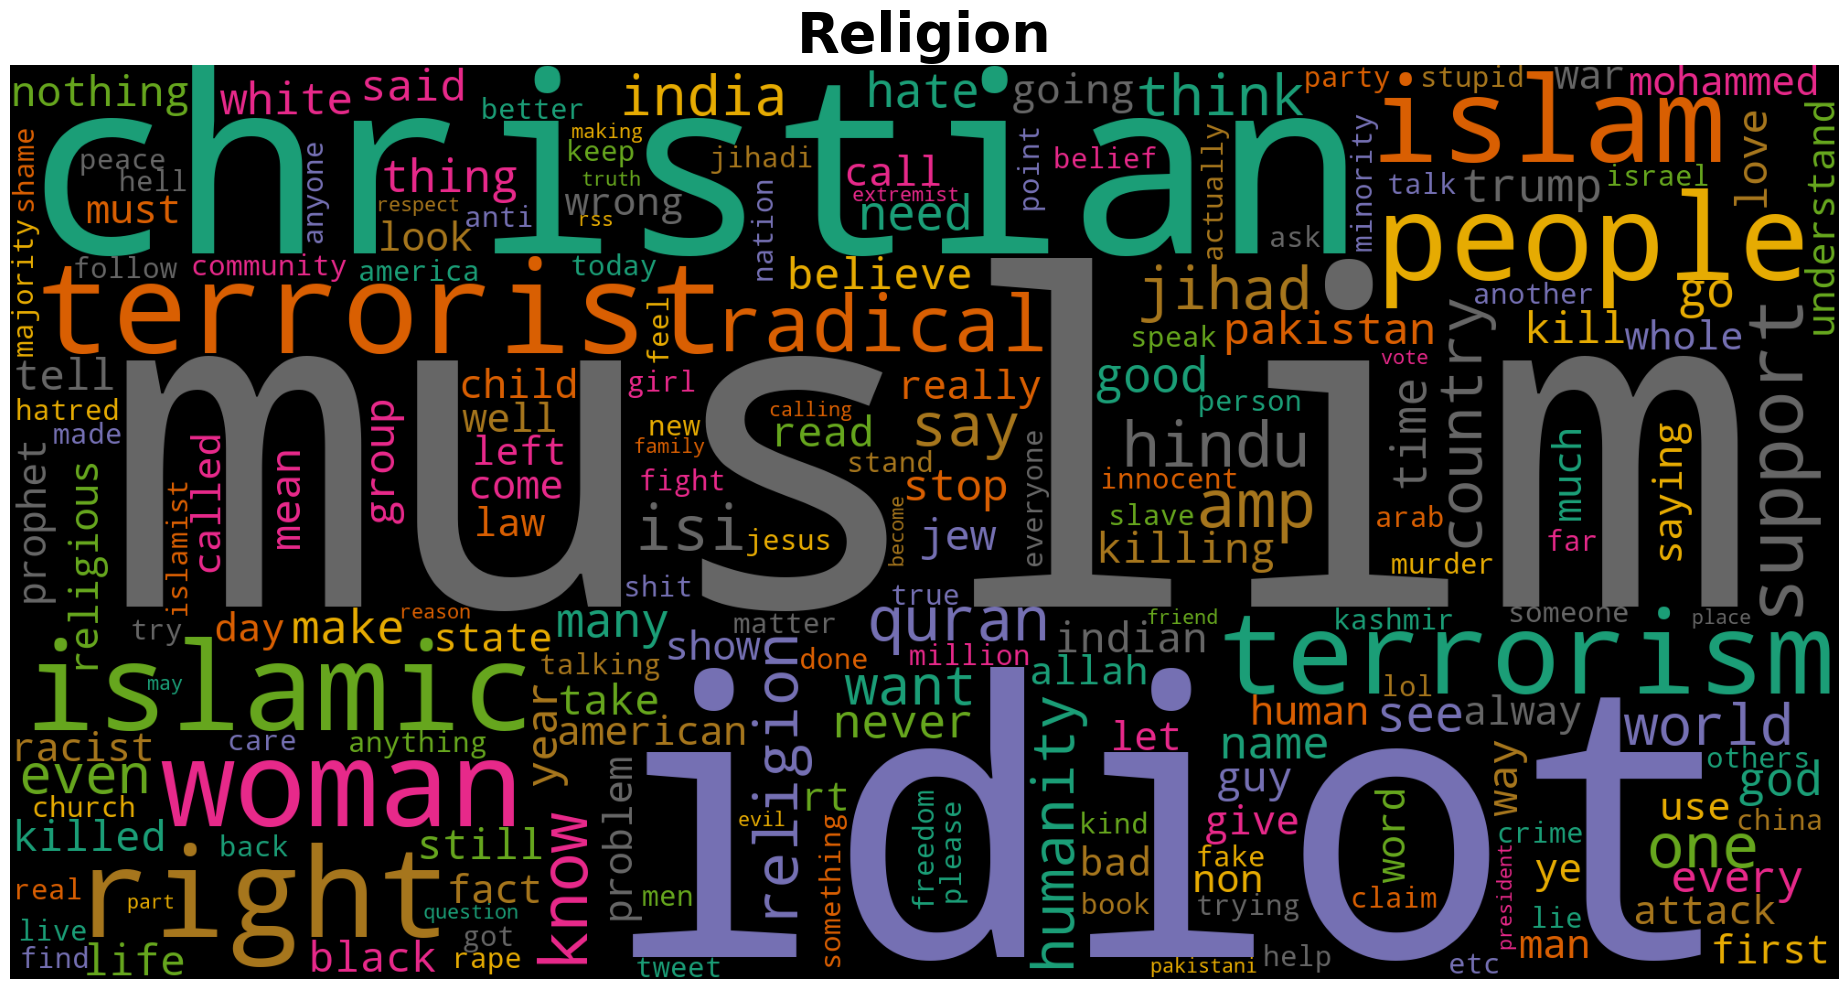

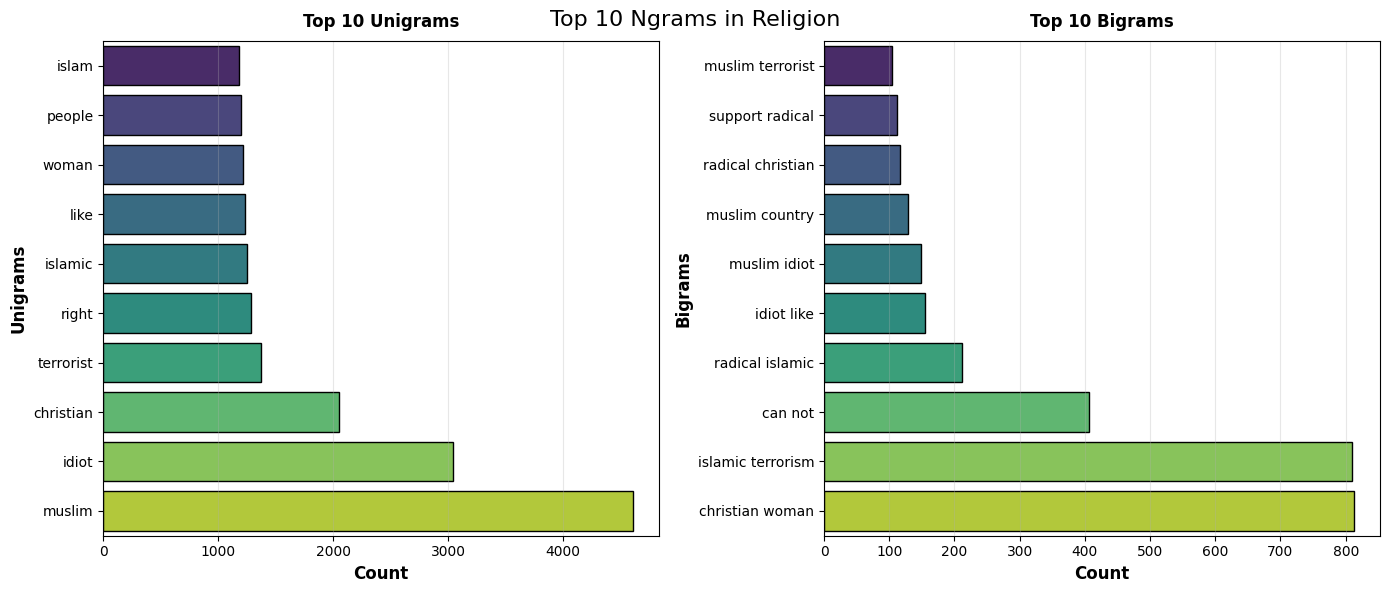

In [149]:
generate_wordcloud('religion', df)
plot_ngrams('religion', df)

### Age

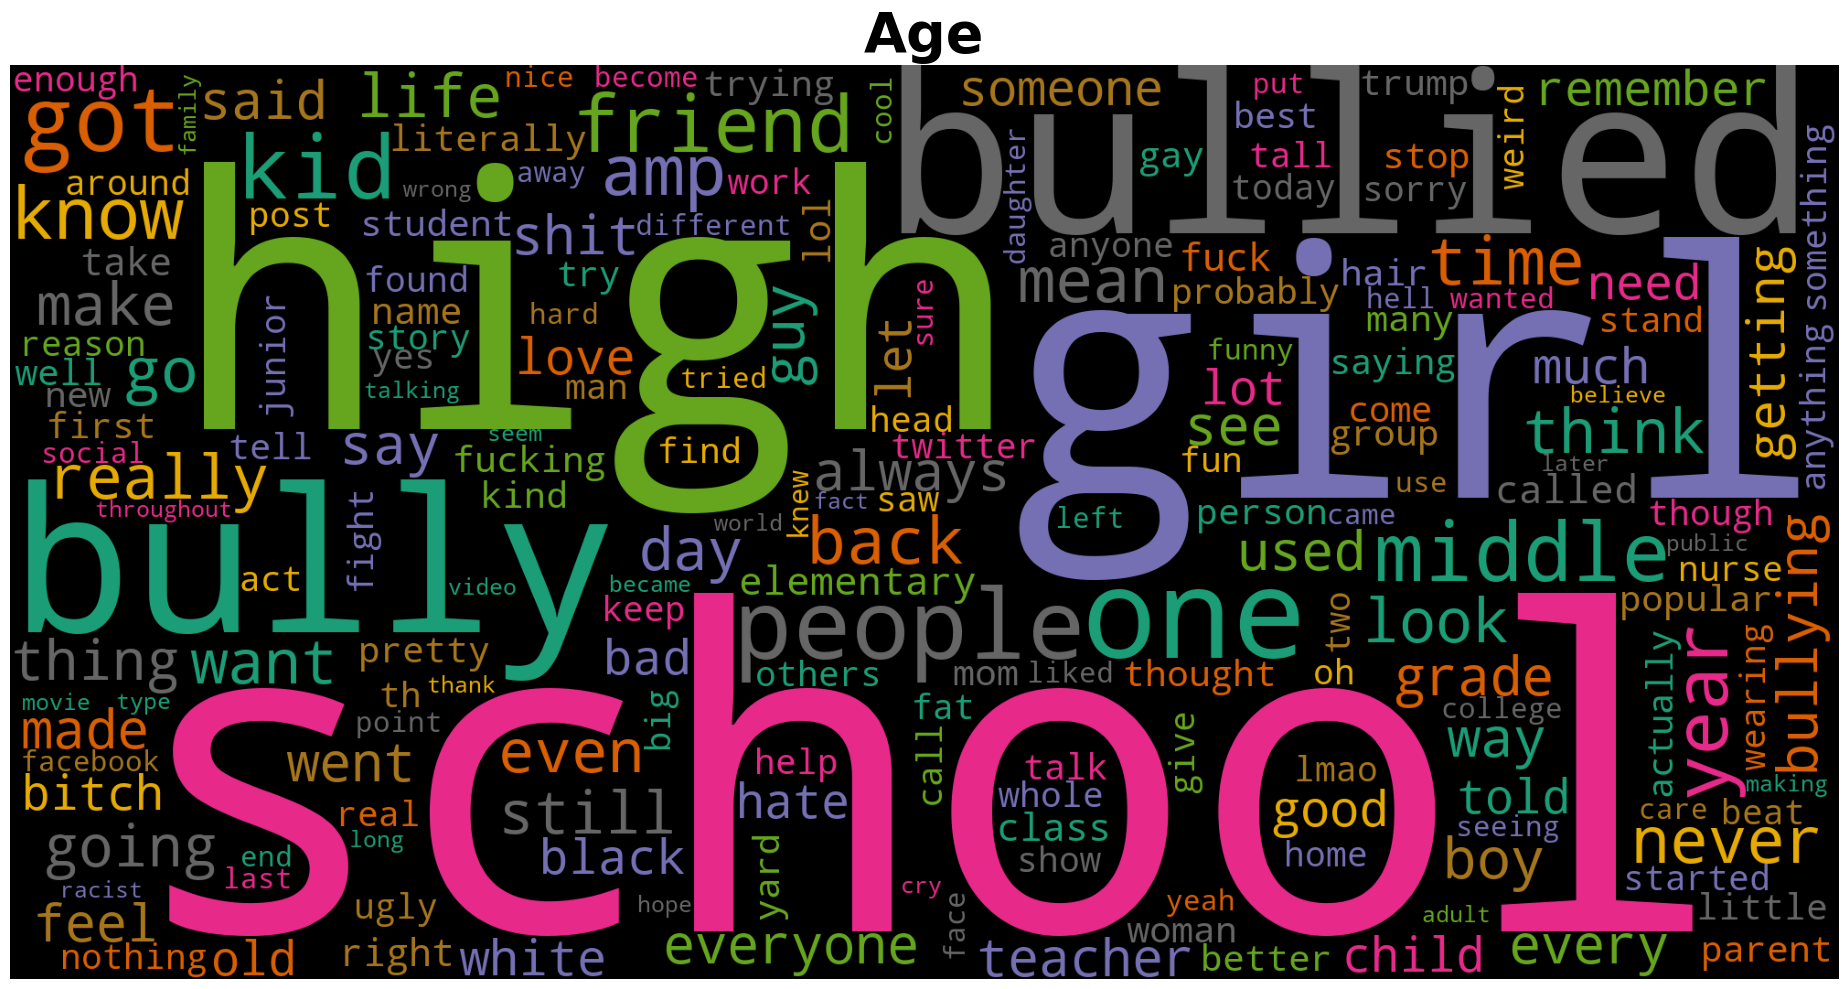

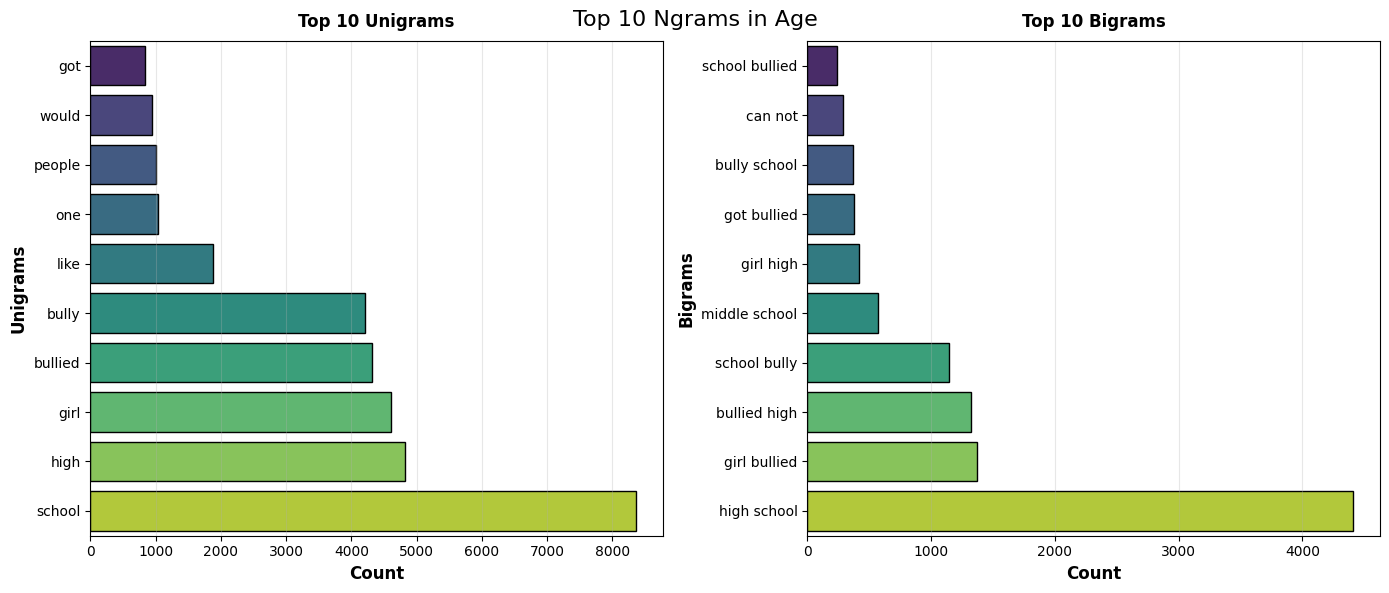

In [150]:
generate_wordcloud('age', df)
plot_ngrams('age', df)

### Ethnicity

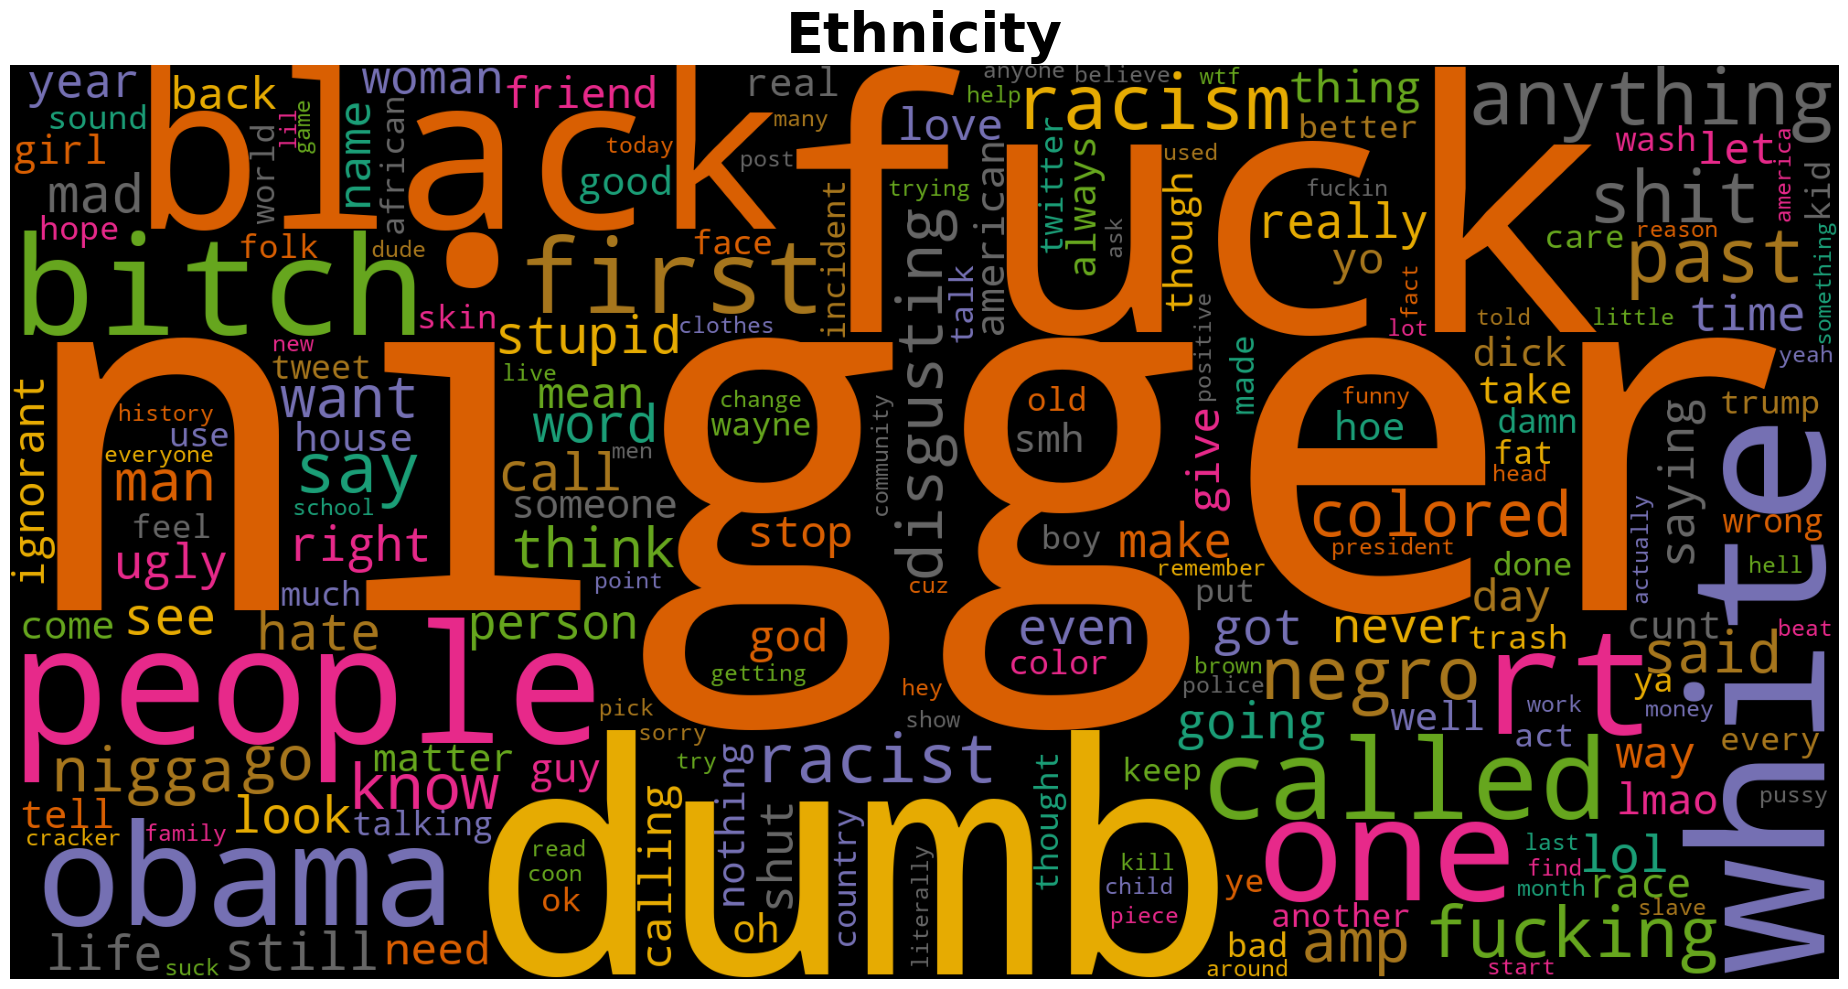

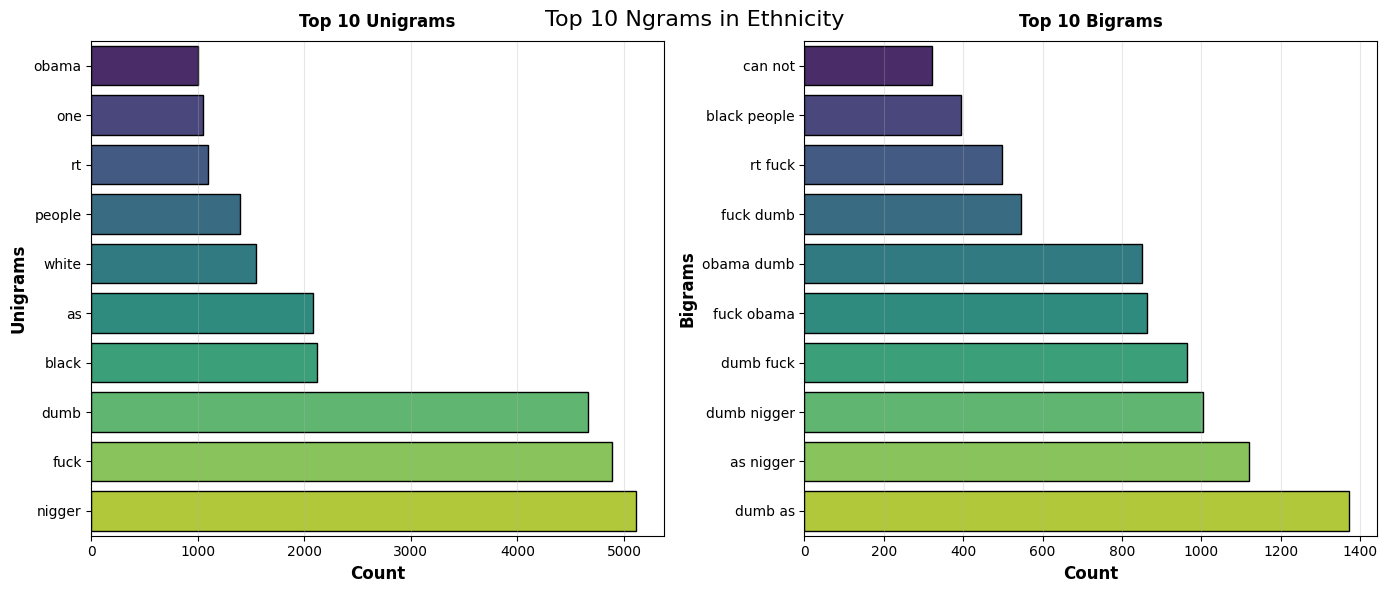

In [151]:
generate_wordcloud('ethnicity', df)
plot_ngrams('ethnicity', df)

### Gender

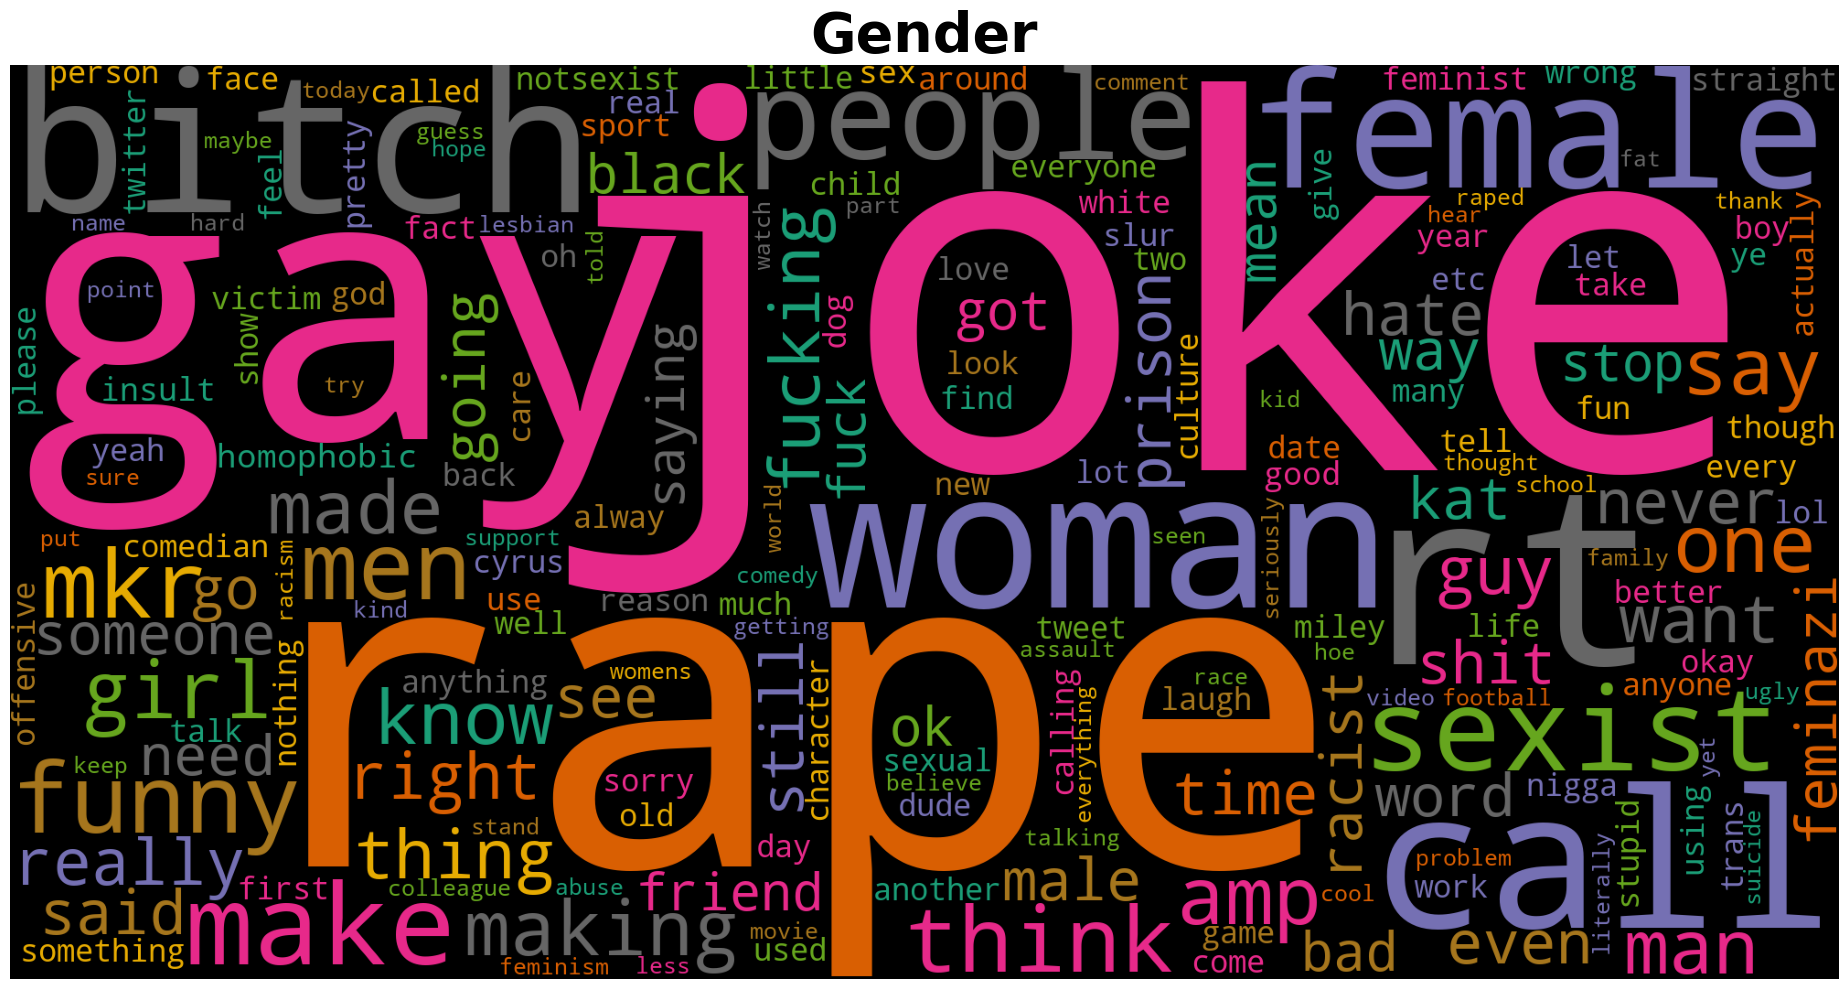

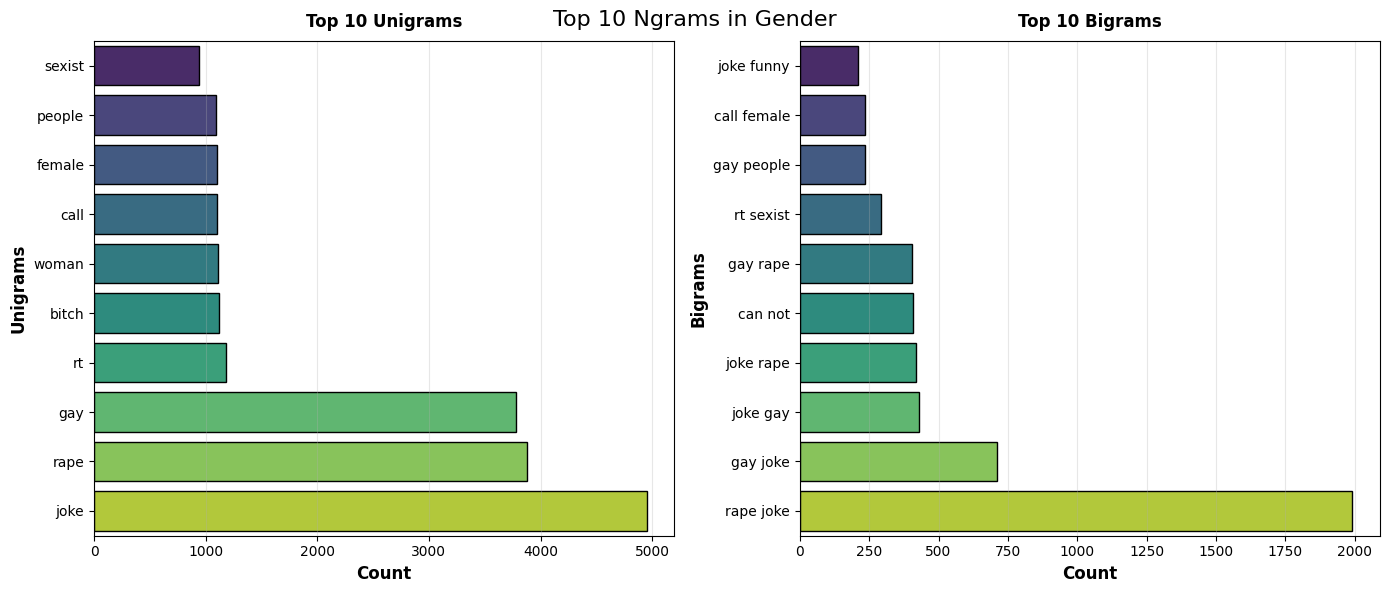

In [152]:
generate_wordcloud('gender', df)
plot_ngrams('gender', df)

### Other_cyberbullying

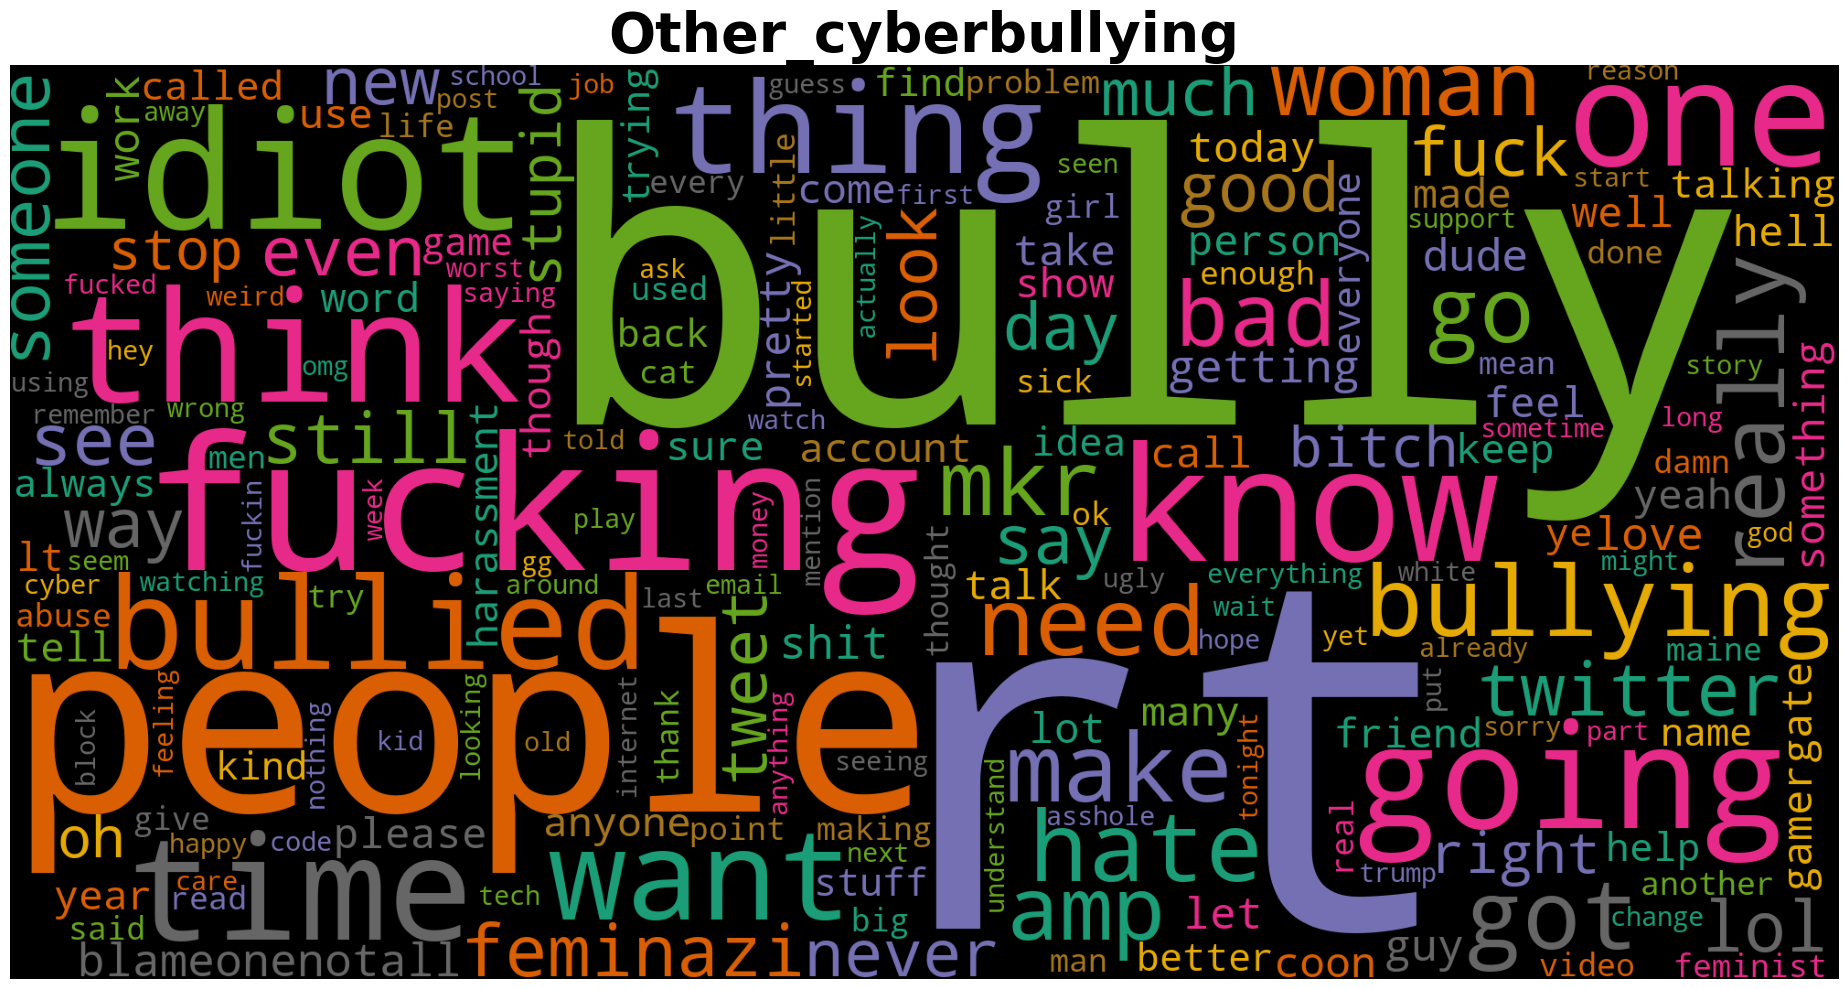

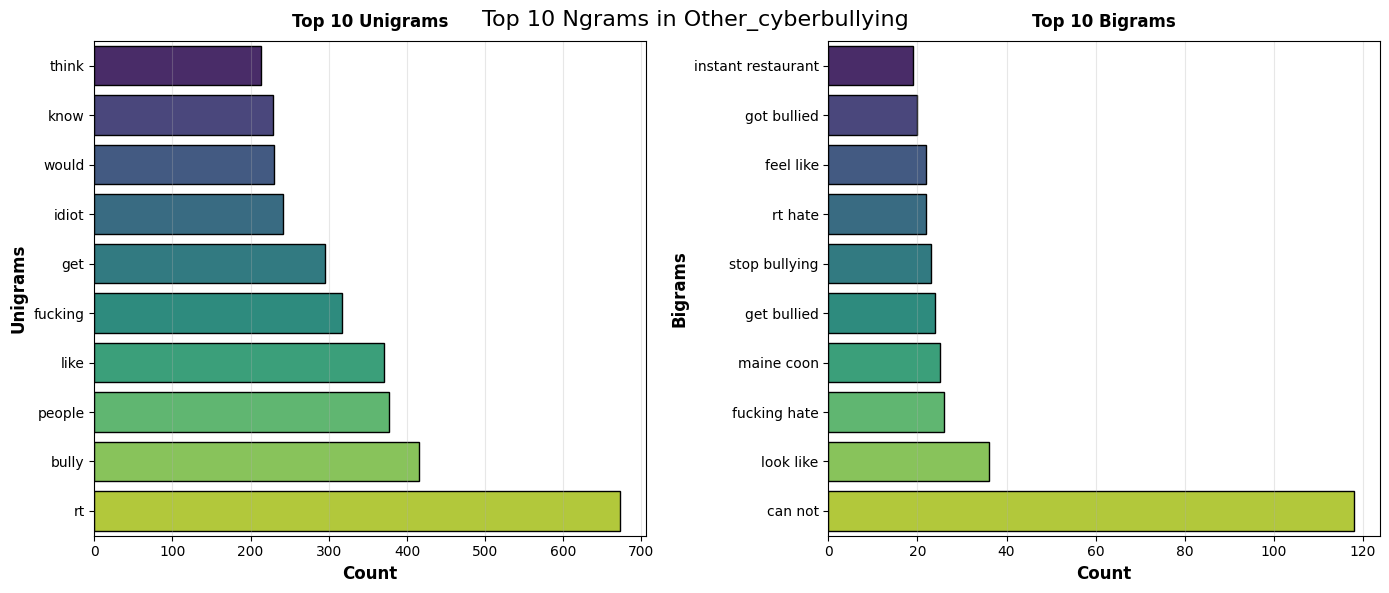

In [153]:
generate_wordcloud('other_cyberbullying', df)
plot_ngrams('other_cyberbullying', df)

### Not_cyberbullying

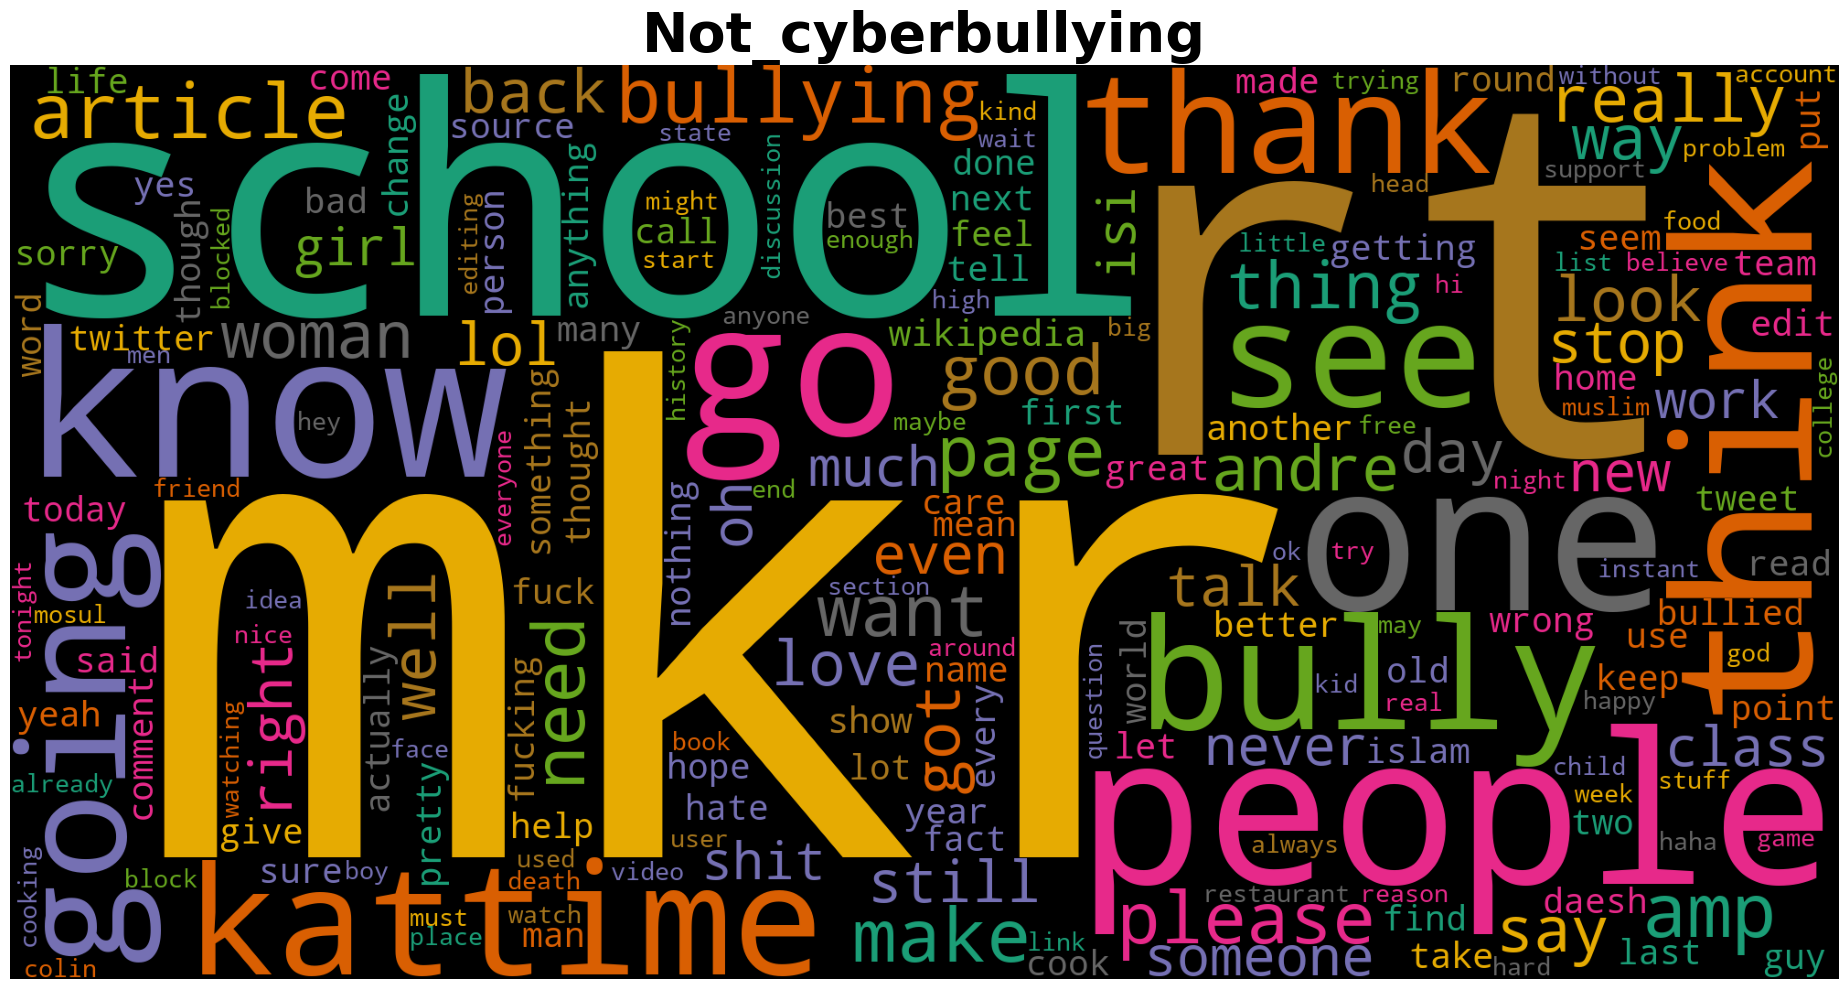

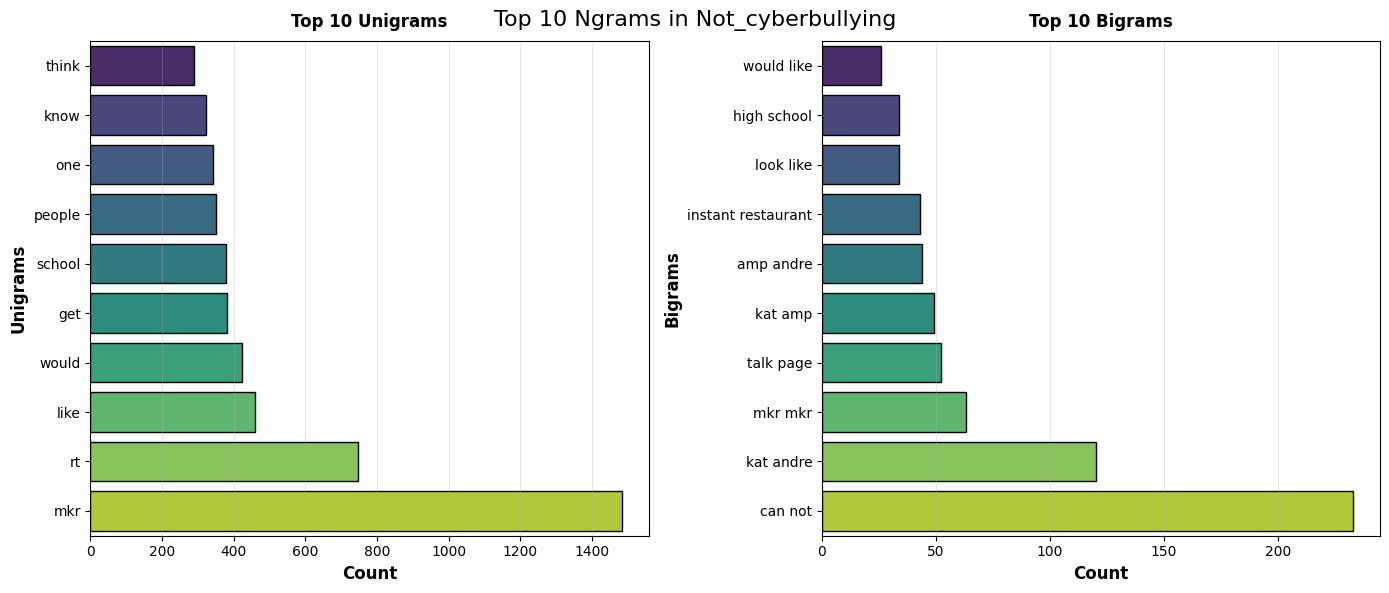

In [154]:
generate_wordcloud('not_cyberbullying', df)
plot_ngrams('not_cyberbullying', df)

As mentioned, a significant number of tweets belonging to the class "other_cyberbullying" have been observed to be removed. Due to the highly unbalanced nature of this class compared to others and its generic nature, a decision has been made to remove tweets labeled as belonging to this class.

Note: It has been noted that by performing some tests, the f1 score for predicting the "other_cyberbullying" class resulted to be around 60%, a value far lower compared to the other f1 scores (around 92% using LSTM model). This supports the decision to remove this class.

In [155]:
# Dropping the other_cyberBulling class
df = df[df["sentiment"]!="other_cyberbullying"]

In [156]:
#  5 sentiments exist in the dataset
sentiments = ["religion","age","ethnicity","gender","not bullying"]

<a name='2.2'></a>

## Tweets length analysis

In [157]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

In [158]:
# Sorting the rows based on the their lenths
df.sort_values(by=['text_len'], ascending=False)

text          sentiment  \
44035  You so black and white trying to live like a n...          ethnicity   
45165  @hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...          ethnicity   
1317   @EurekAlertAAAS: Researchers push to import to...  not_cyberbullying   
33724  ... I don't feel guilty for killing him, I jus...                age   
10922  don't make rape jokes!!! don't make gay jokes!...             gender   
...                                                  ...                ...   
35773               I was a bully in school and it shows                age   
3526         Colin eating... #mkr http://t.co/FN5iyPp86C  not_cyberbullying   
3528       Follow @SoDamnTrue _ its just so damn true!!!  not_cyberbullying   
3531   @Duncanstein Thank you for that dose of #Oddly...  not_cyberbullying   
6      Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   

                                              text_clean  text_len  
44035  black white trying live like nigger pahahahaha...       173  
45165  fuck obama dumb as nigger bitch ltthis whore s...       151  
1317   researcher push import top antibullying progra...       138  
33724  feel guilty killing feel guilty enjoyed tormen...       136  
10922  make rape joke make gay joke oh fat joke okay ...       121  
...                                                  ...       ...  
35773                                  bully school show         3  
3526                                    colin eating mkr         3  
3528                                    follow damn true         3  
3531                    thank dose oddlyspecificmisogyny         3  
6                                                                0  

[38042 rows x 4 columns]

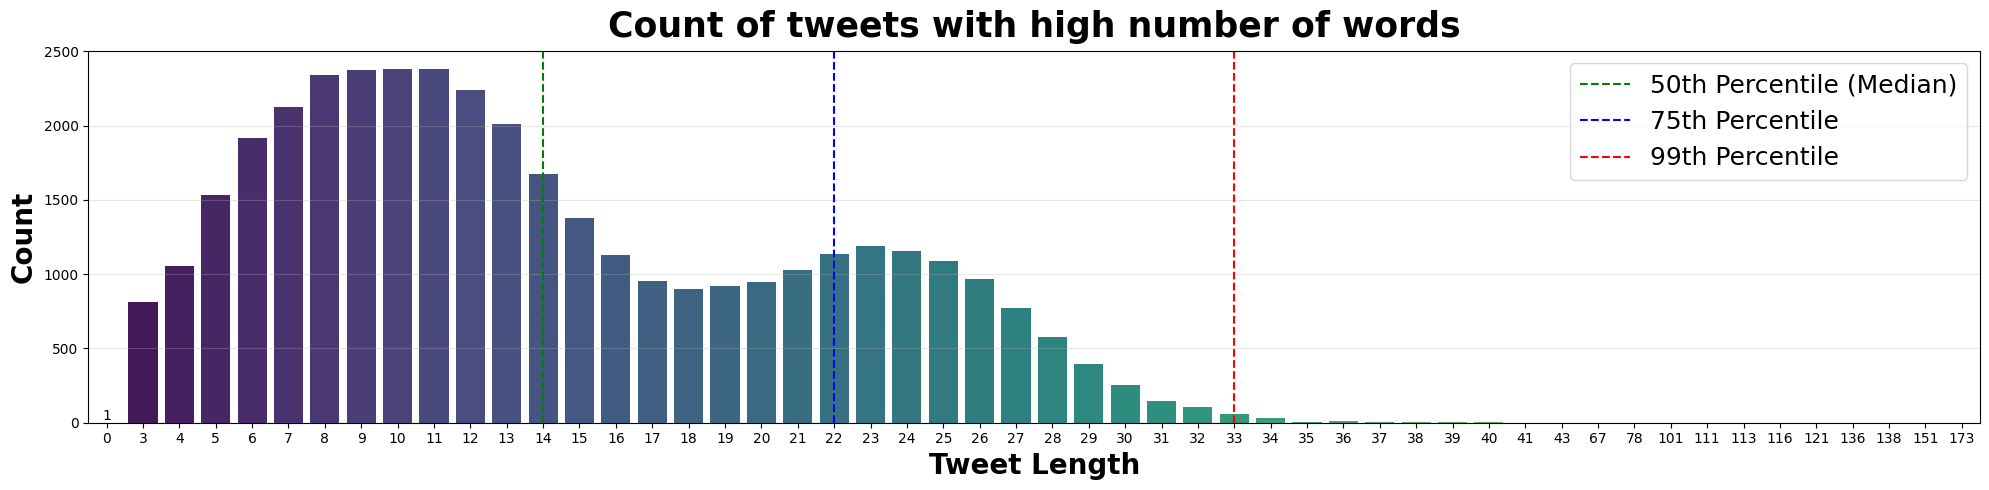

In [159]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='text_len', data=df, palette='viridis')
plt.title('Count of tweets with high number of words', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=20)
plt.xlabel('Tweet Length', fontsize=20)
ax.yaxis.grid(True, alpha=0.3)

# Calculate quartiles
q1 = np.percentile(df['text_len'], 25)
q2 = np.percentile(df['text_len'], 50)
q3 = np.percentile(df['text_len'], 75)
q4 = np.percentile(df['text_len'], 99)


# Add lines for quartiles
plt.axvline(x=q2, color='green', linestyle='--', label='50th Percentile (Median)')
plt.axvline(x=q3, color='blue', linestyle='--', label='75th Percentile')
plt.axvline(x=q4, color='red', linestyle='--', label='99th Percentile')


plt.legend(fontsize = 18)

# Save the plot as SVG
#plt.savefig('tweet_length_plot_with_quartiles.svg', format='svg', bbox_inches='tight')

plt.show()

To organise computational time, a new variable called text_len introduced to represent the word count for each tweet. Figure highlights tweet length distribution, indicating potential outliers beyond the 99th percentile. To optimize efficiency, rows exceeding the 0.99 quantile are removed. As a result, tweets with lengths exceeding 31 are eliminated, and the maximum length for all tweets is capped at 31.

In [160]:
df = df[df['text_len'] < df['text_len'].quantile(0.995)]

In [161]:
df['sentiment'].value_counts()

sentiment
religion             7835
age                  7759
not_cyberbullying    7614
ethnicity            7354
gender               7234
Name: count, dtype: int64

The length of the longest tweet is also obtained since it will be useful later.

In [162]:
max_len = np.max(df['text_len'])
max_len 

np.int64(31)

In [163]:
df.sort_values(by=["text_len"], ascending=False)

text          sentiment  \
31827  yes but can't local government or else our wor...                age   
42342  U really gonna act like a lot of people didnt ...          ethnicity   
14690  - Story hinges on “lesbians can’t be happy” tr...             gender   
41686  @BarackObama can’t believe you would cheer for...          ethnicity   
14770  My grandmother died of lung cancer while telli...             gender   
...                                                  ...                ...   
15452  @boxedariel @LostSailorNY She can abort. Adopt...             gender   
15458  @NOUGLYHOES that's not a feminist, that's a du...             gender   
1980   We go from #DuckDynasty to #HighSchoolMusical2...  not_cyberbullying   
15425  @RyanSorge19 Hey, I had him on 3 of my 4 fanta...             gender   
6      Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   

                                              text_clean  text_len  
31827  yes can not local government else workplace sc...        31  
42342  really going act like lot people dumb shitman ...        31  
14690  story hinge lesbian can not happy trope gay mc...        31  
41686  can not believe would cheer team called white ...        31  
14770  grandmother died lung cancer telling joke trea...        31  
...                                                  ...       ...  
15452                                   abort adopt safe         3  
15458                          feminist dumbass feminazi         3  
1980                    go duckdynasty highschoolmusical         3  
15425                                   hey fantasy team         3  
6                                                                0  

[37796 rows x 4 columns]

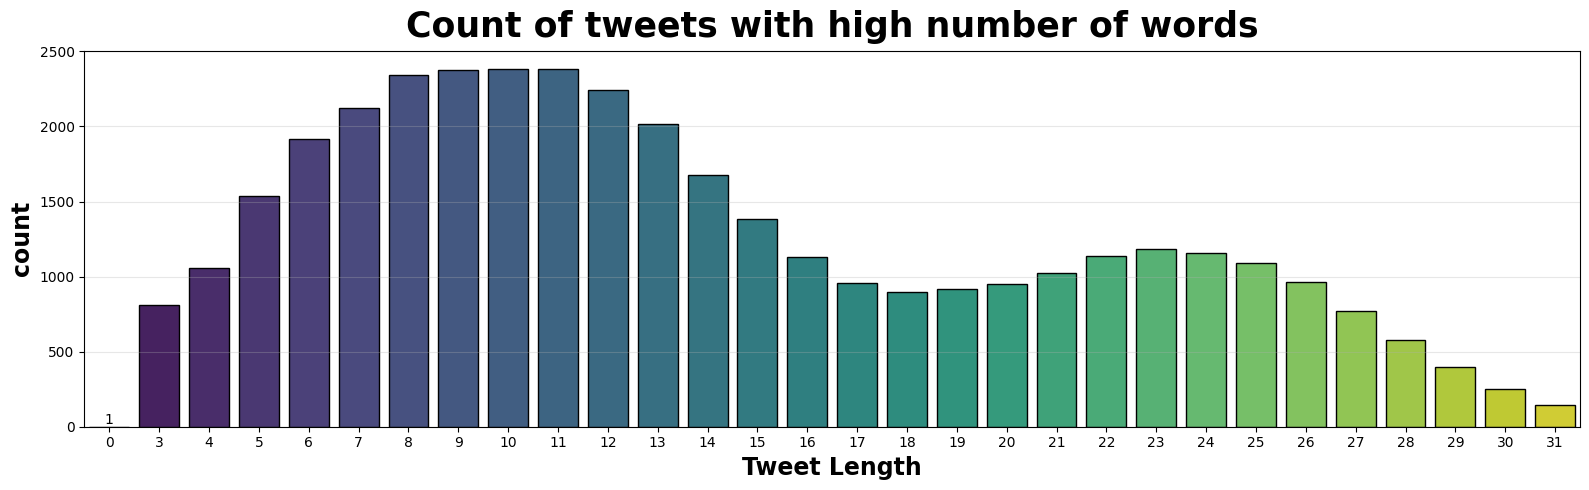

In [164]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df, edgecolor = 'black',palette='viridis')
plt.title('Count of tweets with high number of words', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('count', fontsize = 17)
plt.xlabel('Tweet Length', fontsize = 17)
ax.yaxis.grid(True, alpha = 0.3)
#plt.savefig('tweet_length_plot_after_filter.svg', format='svg', bbox_inches='tight')
plt.show()

<a name='3'></a>

# Traditional medels

### Sentiment column encoding

The target column will be encoded


In [165]:
df['sentiment_code'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

### Train - Test split

In [166]:
df['sentiment_code'].unique()

array([4, 3, 0, 1, 2])

In [167]:
X = df['text_clean']
y = df['sentiment_code']

In [168]:
# using shuffle to ensure that each set (training and testing) contains a representative sample of each category
seed_value = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value, shuffle=True)

In [169]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6268],
       [   1, 6207],
       [   2, 5883],
       [   3, 5787],
       [   4, 6091]])

The classes are not completely balanced, so it could be a good idea to oversample the training set such that all classes have the same count as the most populated one. The RandomOverSampler in Python's imbalanced-learn library is used to balance the class distribution by randomly duplicating samples from the minority class. Given the moderate level of imbalance, oversampling seems like an appropriate approach that shouldn't lead to overfitting issues and does not have the problem of sampling in NLP tasks.

### Oversampling of training set

In [170]:
y_train.value_counts()

sentiment_code
0    6268
1    6207
4    6091
2    5883
3    5787
Name: count, dtype: int64

In [171]:
# using RAndomoverSampler to completely balance the data
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['text_clean', 'sentiment']);

In [172]:
X_train = train_os['text_clean'].values
y_train = train_os['sentiment'].values

In [173]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6268],
       [   1, 6268],
       [   2, 6268],
       [   3, 6268],
       [   4, 6268]])

First, creating a bag of words using CountVectorizer.

In [174]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

The TF-IDF transformation is applied to associate weights to the different words based on their frequency (rarer words will be given more importance).

In [175]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

### Grid Search and Evaluation Functions

In [176]:
def perform_grid_search(clf, param_grid, X, y):
    """
    Performing grid search to find the best hyperparameters.
    """

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

    # Perform grid search on training data
    grid_search.fit(X, y)

    # Best parameters and the best accuracy score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Best Parameters:", best_params)
    print("Best Accuracy Score:", best_score)

    return grid_search

In [177]:
def evaluate_classification_with_model(model_name, model, X_test, y_true, sentiments):
    evaluation_results = {}
    evaluation_results['Model'] = model_name

    if hasattr(model, "predict_proba"):  # traditional models
        y_pred_probs = model.predict_proba(X_test)

        # Predicted classes
        y_pred = model.predict(X_test)

    else:  # neural network models
        # Predicted probabilities
        y_pred_probs = model.predict(X_test)

        # Predicted classes
        y_pred = np.argmax(y_pred_probs, axis=1)

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    evaluation_results['Accuracy'] = accuracy

    # Precision, Recall, F1-score
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    evaluation_results['Precision'] = precision
    evaluation_results['Recall'] = recall
    evaluation_results['F1-score'] = f1

    # ROC-AUC for multi-class classification
    roc_auc = []
    for i in range(len(sentiments)):
        roc_auc.append(roc_auc_score(y_true == i, y_pred_probs[:, i]))
    evaluation_results['ROC-AUC'] = np.mean(roc_auc)

    # PR-AUC for multi-class classification
    pr_auc = []
    for i in range(len(sentiments)):
        pr_auc.append(average_precision_score(y_true == i, y_pred_probs[:, i]))
    evaluation_results['PR-AUC'] = np.mean(pr_auc)

    # ROC curve plotting
    plt.figure(figsize=(5, 5))
    for i, sentiment in enumerate(sentiments):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred_probs[:, i])
        plt.plot(fpr, tpr, label=f'ROC curve ({sentiment}) (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} Classification')
    plt.legend(loc="lower right", fontsize=12)

    plt.show()

    # Print evaluation metrics with correct formatting
    for key, value in evaluation_results.items():
        if isinstance(value, (int, float)):  # Check if the value is numeric
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}: {value}")

    return evaluation_results


In [178]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(6.5,6.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="viridis", fmt='g', cbar=False, annot_kws={"size":20})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=15.5) 
    ax.yaxis.set_ticklabels(labels, fontsize=15.5)
    ax.set_ylabel('Test', fontsize=15)
    ax.set_xlabel('Predicted', fontsize=15)

    file_name = f"{title}_confusion_matrix.svg"
    #plt.savefig(file_name, format='svg', bbox_inches='tight')
    plt.show()

<a name='3.1'></a>

## Random Forest
As the dataset is large and the model size is too big for using gridSearch in Random Forest, hyperparameters such as n_estimators, max_depth, and min_samples_split are manually tuned. The parameters that lead to better results than the default settings are selected and used to train the final model.

In [179]:
list_of_evaluations = [] # this list of all models' evaluations
runtime = {} # a dictionary containing all model's runtimes

In [180]:
start_time = time.time()

rf_clf = RandomForestClassifier(n_estimators=150)
rf_clf.fit(X_train_tf, y_train)

end_time = time.time()

# Calculate the runtime
runtime['RF'] = end_time - start_time

In [181]:
runtime

{'RF': 161.6762981414795}

Classification Report for Random Forest:
               precision    recall  f1-score   support

    religion       0.97      0.96      0.96      1567
         age       0.98      0.98      0.98      1552
   ethnicity       0.99      0.99      0.99      1471
      gender       0.96      0.87      0.92      1447
not bullying       0.84      0.92      0.88      1523

    accuracy                           0.94      7560
   macro avg       0.95      0.94      0.94      7560
weighted avg       0.95      0.94      0.95      7560



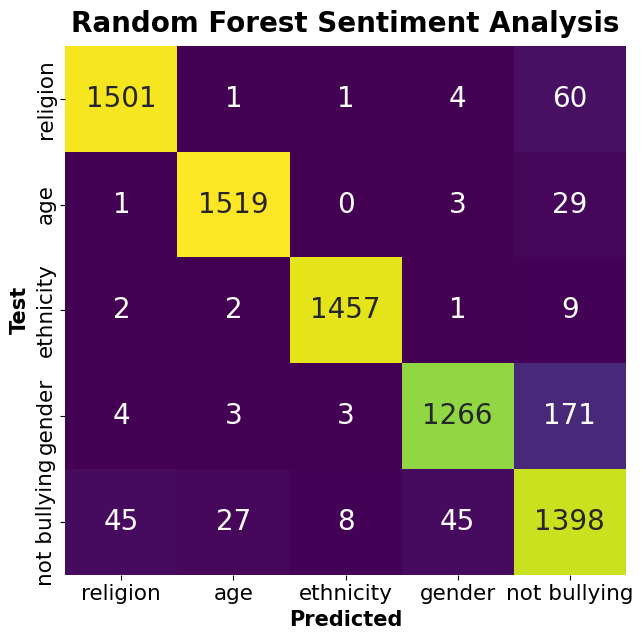

In [182]:
rf_pred = rf_clf.predict(X_test_tf)

print('Classification Report for Random Forest:\n',classification_report(y_test, rf_pred, target_names=sentiments))
conf_matrix(y_test,rf_pred,'Random Forest Sentiment Analysis', sentiments)

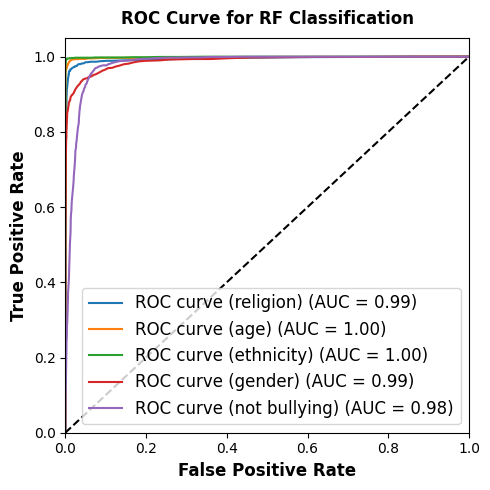

Model: RF
Accuracy: 0.9446
Precision: 0.9471
Recall: 0.9440
F1-score: 0.9448
ROC-AUC: 0.9921
PR-AUC: 0.9701


In [183]:
list_of_evaluations.append(evaluate_classification_with_model('RF', rf_clf, X_test_tf, y_test,sentiments))

In [184]:
import pickle

with open("rf_clf.pkl", "wb") as f:
    pickle.dump(rf_clf, f)

with open("clf.pkl", "wb") as f:
    pickle.dump(clf, f)

<a name='3.2'></a>

## Gradient Boosting Classifier
As the dataset is large and the model size is too big for using gridSearch in GB, hyperparameters such as n_estimators and max_depth are manually tuned. The parameters that lead to better results than the default settings are selected and used to train the final model.

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    religion       0.97      0.93      0.95      1567
         age       0.98      0.97      0.98      1552
   ethnicity       1.00      0.98      0.99      1471
      gender       0.96      0.87      0.91      1447
not bullying       0.80      0.92      0.86      1523

    accuracy                           0.94      7560
   macro avg       0.94      0.94      0.94      7560
weighted avg       0.94      0.94      0.94      7560



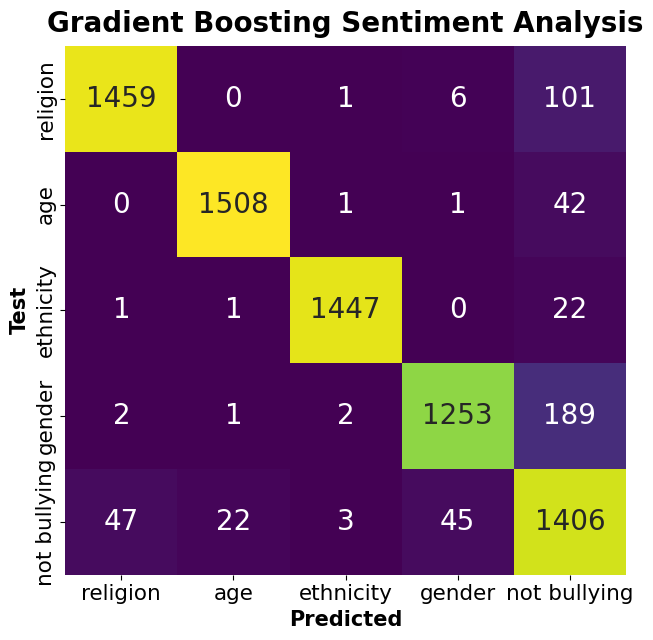

In [185]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(n_estimators=150)
gb_clf.fit(X_train_tf, y_train)
end_time = time.time()

# Calculate the runtime
runtime['GB'] = end_time - start_time

gb_pred = gb_clf.predict(X_test_tf)

print('Classification Report for Gradient Boosting:\n',classification_report(y_test, gb_pred, target_names=sentiments))
conf_matrix(y_test,gb_pred,'Gradient Boosting Sentiment Analysis', sentiments)

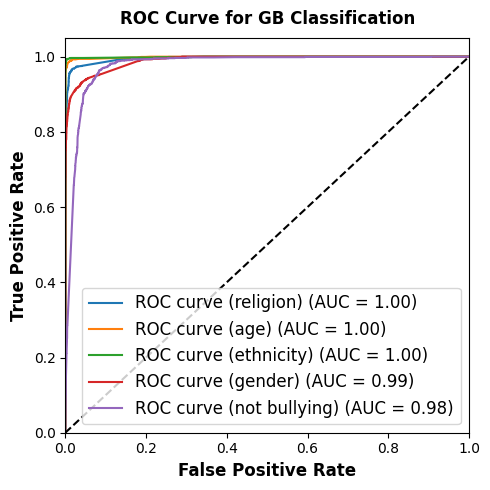

Model: GB
Accuracy: 0.9356
Precision: 0.9411
Recall: 0.9351
F1-score: 0.9366
ROC-AUC: 0.9920
PR-AUC: 0.9661


In [186]:
list_of_evaluations.append(evaluate_classification_with_model('GB', gb_clf, X_test_tf, y_test,sentiments))

<a name='3.3'></a>

## Multinomial Naive Bayes classifier
GridSearch is used to find the best hyper parameters

In [187]:
# Defining the parameter grid
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
}
# Initialize Multinomial Naive Bayes classifier
start_time = time.time()
clf = MultinomialNB()

nb_clf = perform_grid_search(clf, nb_param_grid, X_train_tf, y_train)
end_time = time.time()
runtime['NB'] = end_time - start_time

Best Parameters: {'alpha': 0.5}
Best Accuracy Score: 0.8540523292916401


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    religion       0.86      0.95      0.90      1567
         age       0.81      0.98      0.88      1552
   ethnicity       0.89      0.90      0.90      1471
      gender       0.88      0.87      0.87      1447
not bullying       0.83      0.55      0.66      1523

    accuracy                           0.85      7560
   macro avg       0.85      0.85      0.84      7560
weighted avg       0.85      0.85      0.84      7560



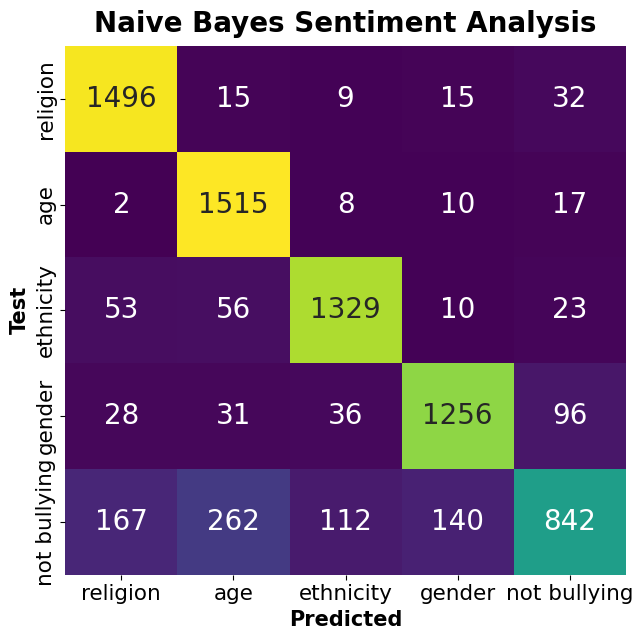

In [188]:
nb_pred = nb_clf.predict(X_test_tf)

print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=sentiments))
conf_matrix(y_test,nb_pred,'Naive Bayes Sentiment Analysis', sentiments)

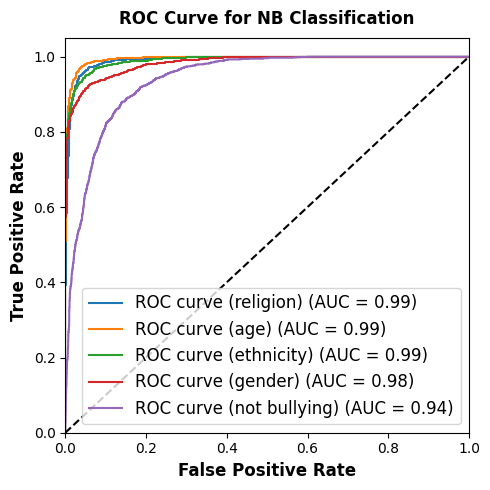

Model: NB
Accuracy: 0.8516
Precision: 0.8528
Recall: 0.8510
F1-score: 0.8441
ROC-AUC: 0.9796
PR-AUC: 0.9317


In [189]:
# evaluation_result = evaluating_new(nb_clf, X_test_tf, y_test, 'Naive Bayes')
list_of_evaluations.append(evaluate_classification_with_model('NB', nb_clf, X_test_tf, y_test, sentiments))

<a name='3.4'></a>

## LogisticRegression

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    religion       0.96      0.94      0.95      1567
         age       0.94      0.98      0.96      1552
   ethnicity       0.98      0.98      0.98      1471
      gender       0.95      0.87      0.91      1447
not bullying       0.81      0.85      0.83      1523

    accuracy                           0.92      7560
   macro avg       0.93      0.92      0.92      7560
weighted avg       0.93      0.92      0.92      7560



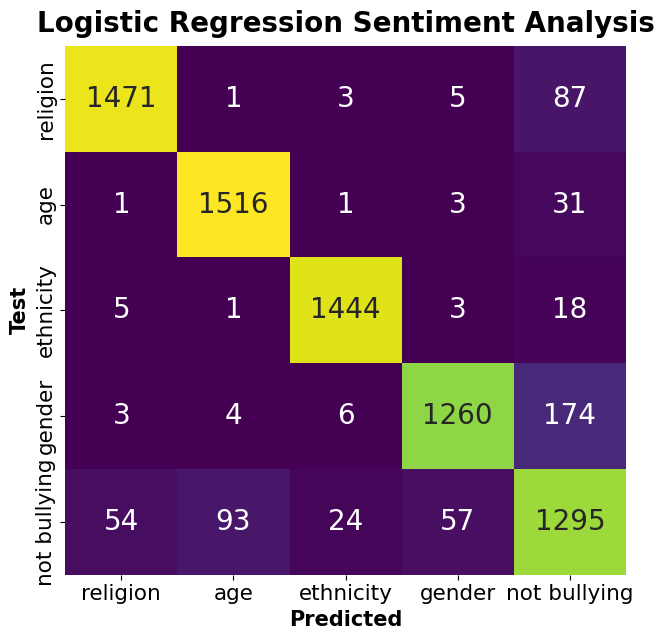

In [190]:
start_time = time.time()

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_tf, y_train)

end_time = time.time()
runtime['LR'] = end_time - start_time

lr_pred = lr_clf.predict(X_test_tf)

print('Classification Report for Logistic Regression:\n',classification_report(y_test, lr_pred, target_names=sentiments))

conf_matrix(y_test,lr_pred,'Logistic Regression Sentiment Analysis', sentiments)

<a name='3.5'></a>

## SVC
The most efficient kernel found for the Support Vector Classifier (SVC) is the sigmoid kernel. It's noteworthy that its performance is comparable to that of the 'rbf' kernel, yet it exhibits significantly lower runtime.

Classification Report for SVM:
               precision    recall  f1-score   support

    religion       0.96      0.94      0.95      1567
         age       0.94      0.98      0.96      1552
   ethnicity       0.97      0.99      0.98      1471
      gender       0.95      0.88      0.91      1447
not bullying       0.83      0.84      0.84      1523

    accuracy                           0.93      7560
   macro avg       0.93      0.93      0.93      7560
weighted avg       0.93      0.93      0.93      7560



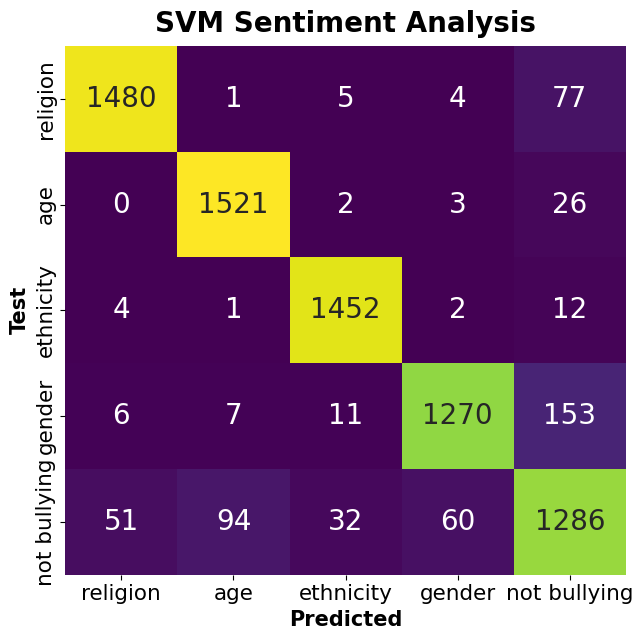

In [191]:
#start_time = time.time()

svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train_tf, y_train)

#end_time = time.time()
#runtime['SVC'] = end_time - start_time


svm_pred = svm_clf.predict(X_test_tf)

print('Classification Report for SVM:\n',classification_report(y_test, svm_pred, target_names=sentiments))

conf_matrix(y_test,svm_pred,'SVM Sentiment Analysis', sentiments)

<a name='3.6'></a>

## Stacking

In [192]:
def get_stacking():
    '''
    Create a stacking classifier
    '''
    level0 = []
    level0.append(('DT', RandomForestClassifier()))
    level0.append(('SVC', SVC(kernel='sigmoid')))
    level0.append(('NB', MultinomialNB(alpha = 0.5)))
    
    level1 = RandomForestClassifier()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv = 5)
    return model

In [193]:
start_time = time.time()

stacking_model = get_stacking();

stacking_model.fit(X_train_tf, y_train)

end_time = time.time()
runtime['Stacking'] = end_time - start_time


Classification Report for stacking_model:
               precision    recall  f1-score   support

    religion       0.97      0.96      0.96      1567
         age       0.99      0.98      0.98      1552
   ethnicity       0.99      0.99      0.99      1471
      gender       0.94      0.90      0.92      1447
not bullying       0.86      0.90      0.88      1523

    accuracy                           0.95      7560
   macro avg       0.95      0.95      0.95      7560
weighted avg       0.95      0.95      0.95      7560



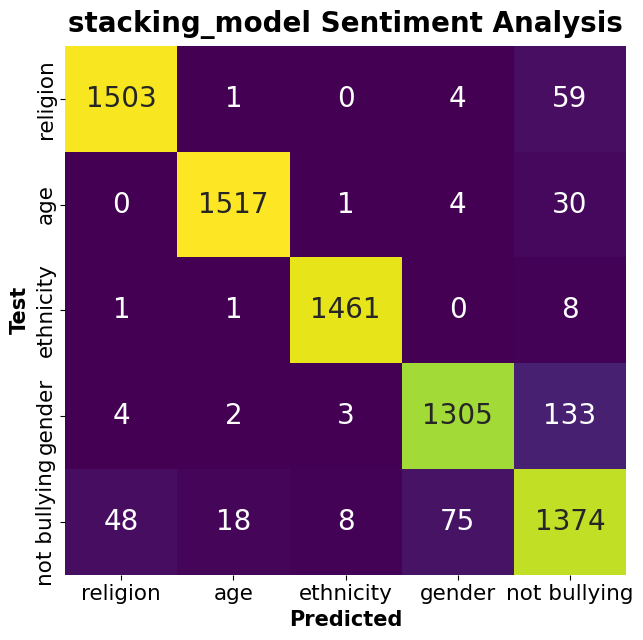

In [194]:
stacking_pred = stacking_model.predict(X_test_tf)

print('Classification Report for stacking_model:\n',classification_report(y_test, stacking_pred, target_names=sentiments))

conf_matrix(y_test,stacking_pred,'stacking_model Sentiment Analysis', sentiments)

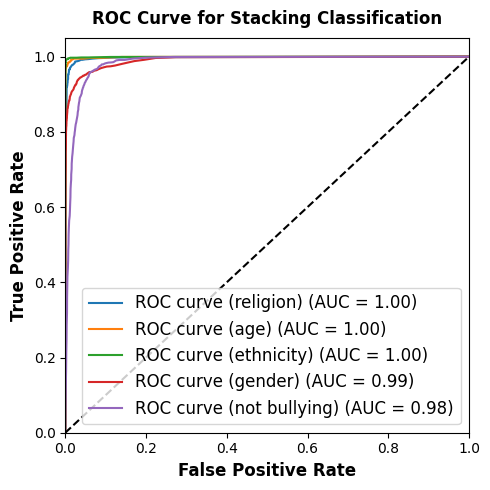

Model: Stacking
Accuracy: 0.9471
Precision: 0.9481
Recall: 0.9468
F1-score: 0.9472
ROC-AUC: 0.9941
PR-AUC: 0.9759


In [195]:
list_of_evaluations.append(evaluate_classification_with_model('Stacking', stacking_model, X_test_tf, y_test,sentiments))

<a name='3.7'></a>

## Comparing the evaluations of traditional models

In [196]:
evaluation_df = pd.DataFrame(list_of_evaluations)

In [197]:
evaluation_df.set_index('Model', inplace=True)
evaluation_df

Accuracy  Precision    Recall  F1-score   ROC-AUC    PR-AUC
Model                                                                
RF        0.944577   0.947107  0.943988  0.944793  0.992058  0.970096
GB        0.935582   0.941080  0.935104  0.936626  0.992038  0.966146
NB        0.851587   0.852805  0.851035  0.844069  0.979604  0.931653
Stacking  0.947090   0.948061  0.946768  0.947211  0.994095  0.975940

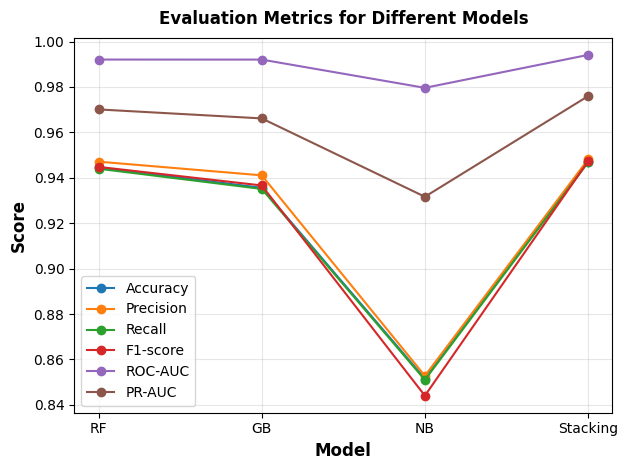

In [198]:
# Plot all evaluation metrics for all models
for metric in evaluation_df.columns:
    plt.plot(evaluation_df.index, evaluation_df[metric], marker='o', label=metric)

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Models')
plt.legend()
#plt.xticks(rotation=45)  
plt.grid(True, alpha = 0.3)  
plt.tight_layout() 

#plt.savefig('evaluation_metrics_plot.svg', format='svg')

plt.show()

In [199]:
runtime

{'RF': 161.6762981414795,
 'GB': 277.89432430267334,
 'NB': 19.031346559524536,
 'LR': 9.15376329421997,
 'Stacking': 1513.1042873859406}

In [200]:
import pickle

# Save the model and vectorizer
with open("model.pkl", "wb") as model_file:
    pickle.dump(rf_clf, model_file)

with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Load them later
with open("model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("vectorizer.pkl", "rb") as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

In [ ]:
print(df.shape)  # Should output (n_samples, 34367)
print(df2.shape)  # Should output (1, 34367) if you're predicting one message


(37796, 5)
(115864, 2)


: 

In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
import re
import nltk

# Load the pre-trained model and vectorizer
model = joblib.load("rf_clf.pkl")  # Replace with the correct file path
vectorizer = joblib.load("vectorizer.pkl")  # Replace with the correct file path

# Define a preprocessing function similar to the notebook
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenization
    words = nltk.word_tokenize(text)
    # Lemmatization (if applied in the notebook)
    lemmatizer = nltk.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

# Define the GUI
class ChatGUI:
    def __init__(self, master, partner_name):
        self.master = master
        self.partner_name = partner_name
        self.master.title(f"Chat with {partner_name}")

        # GUI elements
        self.chat_history = tk.Text(self.master, height=10, state=tk.DISABLED)
        self.chat_history.pack()

        self.chat_input = tk.Entry(self.master, width=50)
        self.chat_input.pack(pady=5)

        self.send_button = tk.Button(self.master, text="Send", command=self.check_message)
        self.send_button.pack()

    def check_message(self):
        message = self.chat_input.get()
        if not message.strip():
            return  # Ignore empty messages

        # Preprocess the message
        processed_message = preprocess_text(message)
        transformed_message = vectorizer.transform([processed_message])
        prediction = model.predict(transformed_message)

        # Cyberbullying check
        if prediction[0] == "not_cyberbullying":  # Adjust based on your model's output labels
            self.display_message("You", message)
            self.chat_input.delete(0, tk.END)
        else:
            messagebox.showwarning("Warning", "Cyberbullying Detected!")

    def display_message(self, sender, message):
        self.chat_history.config(state=tk.NORMAL)
        self.chat_history.insert(tk.END, f"{sender}: {message}\n")
        self.chat_history.config(state=tk.DISABLED)

# Main Application
def main():
    root = tk.Tk()
    root.geometry("400x300")
    
    # Open chat windows
    partner1_window = tk.Toplevel(root)
    partner2_window = tk.Toplevel(root)

    partner1 = ChatGUI(partner1_window, "Partner 2")
    partner2 = ChatGUI(partner2_window, "Partner 1")

    root.mainloop()

if __name__ == "__main__":
    main()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_19708\3711941374.py", line 49, in check_message
    prediction = model.predict(transformed_message)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\5th sem\NLP\eldup\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 904, in predict
    proba = self.predict_proba(X)
            ^^^^^^^^^^^^^^^^^^^^^
  File "d:\5th sem\NLP\eldup\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 946, in predict_proba
    X = self._validate_X_predict(X)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\5th sem\NLP\eldup\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 641, in _validate_X_predict
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^